# Experiments with Information Bottleneck

## Preliminary steps

#### Installation of NPEET

In [1]:
%%bash

git clone https://github.com/gregversteeg/NPEET.git

Cloning into 'NPEET'...


#### Necessary imports

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from infoplane import IB
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils import plot_model
from keras.models import Sequential
from IPython.display import Image, SVG
from keras.models import Model, load_model
from sklearn.metrics import classification_report
from keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Flatten, concatenate, LSTM, Reshape

Using TensorFlow backend.


In [3]:
plt.rcParams['figure.figsize'] = (7,7)

In [4]:
np.random.seed(42)

## MNIST preprocessing

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [8]:
X_train = X_train[0:1000]
X_test = X_test[0:100]
y_train = y_train[0:1000]
y_test = y_test[0:100]

## Definition of models

In [9]:
def getFCNN(X, Y, input_layer, output_layer, hidden_units):
    """Make a fully connected network with arbitrary configuration"""
    x = Dense(hidden_units[0], activation="elu")(input_layer)
    for a in range(1, len(hidden_units)):
        x = Dense(hidden_units[a], activation="elu")(x) 
    m = Model(input_layer, output_layer(x))
    m.compile(optimizer="adam", loss="mae")
    return(m)

## Information plane plots

In [10]:
ib = IB()

In [11]:
input_layer = lambda : Input(shape=(784,))
output_layer = lambda : Dense(1, activation="linear")

In [12]:
hidden_units = [256,128,64,32]

In [13]:
def make_plane(n, hu, colors, ff):
    def once(i):
        print(i)
        snp_mod = getFCNN(X_train, y_train, input_layer(), output_layer(), hu)
        snp_mod = ff(snp_mod)
        reps = IB.get_all_reps(snp_mod)
        coords = []
        for b in reps:
            coords.append(ib.coords(X_test, y_test, b(snp_mod).predict(X_test)))
        cc = IB.to_plane(coords)
        cc["color"] = colors
        return(cc)
    return(pd.concat([once(a) for a in range(n)]))

In [14]:
def fit_model(m,n):
    m.fit(X_train, y_train, epochs=n, shuffle="batch")
    return(m)

##### Before fitting

In [15]:
snp_b4 = make_plane(10, hidden_units, ["black", "red", "green", "blue", "yellow"], lambda x: x)

0
1
2
3
4
5
6
7
8
9


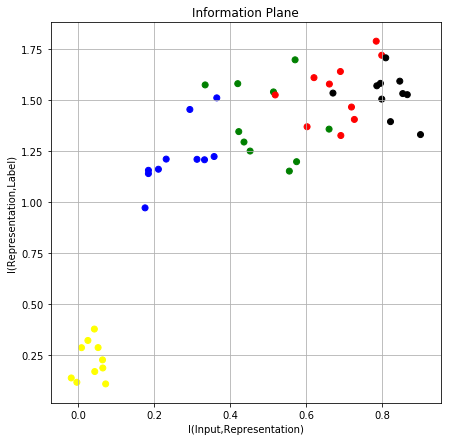

In [16]:
IB.plot(snp_b4)

##### After 400 epochs

In [17]:
snp_400 = make_plane(
    10, hidden_units, ["black", "red", "green", "blue", "yellow"], 
    lambda x: fit_model(x, 400)
)

0
Epoch 1/400
1000/1000 [==============================] - 0s - loss: 1.9513     
Epoch 2/400
1000/1000 [==============================] - 0s - loss: 1.2969     
Epoch 3/400
1000/1000 [==============================] - 0s - loss: 1.0692     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 0.9775     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.8380     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.7605     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.6633     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.5808     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.6071     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.5248     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.4686     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.4675     
Epoch 13/400
1000/1000 [===========

1000/1000 [==============================] - 0s - loss: 0.0682     
Epoch 103/400
1000/1000 [==============================] - 0s - loss: 0.0726     
Epoch 104/400
1000/1000 [==============================] - 0s - loss: 0.1060     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0949     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0956     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.1023     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0783     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0845     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0869     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0790     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0718     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0692     
Epoch 114/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0471     
Epoch 203/400
1000/1000 [==============================] - 0s - loss: 0.0364     
Epoch 204/400
1000/1000 [==============================] - 0s - loss: 0.0438     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0444     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0528     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0473     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0437     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0384     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0391     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0570     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0542     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0457     
Epoch 214/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0312     
Epoch 303/400
1000/1000 [==============================] - 0s - loss: 0.0306     
Epoch 304/400
1000/1000 [==============================] - 0s - loss: 0.0332     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0311     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0290     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0261     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0267     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0285     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0315     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0295     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0347     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0338     
Epoch 314/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 1.3864     
Epoch 3/400
1000/1000 [==============================] - 0s - loss: 1.1026     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 0.9513     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.8627     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.7269     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.6707     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6026     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.5626     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.5014     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.4475     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.4454     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.3752     
Epoch 14/400
1000/1000 [========================

1000/1000 [==============================] - 0s - loss: 0.0639     
Epoch 104/400
1000/1000 [==============================] - 0s - loss: 0.0697     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0722     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0617     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0790     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0631     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0611     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0627     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0664     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0588     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0567     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0639     
Epoch 115/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0352     
Epoch 203/400
1000/1000 [==============================] - 0s - loss: 0.0363     
Epoch 204/400
1000/1000 [==============================] - 0s - loss: 0.0368     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0401     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0314     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0343     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0389     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0371     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0331     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0351     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0302     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0348     
Epoch 214/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0268     
Epoch 303/400
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 304/400
1000/1000 [==============================] - 0s - loss: 0.0236     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0284     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0252     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0220     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0253     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0312     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0252     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0261     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0352     
Epoch 314/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 1.3487     
Epoch 3/400
1000/1000 [==============================] - 0s - loss: 1.0698     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 0.9550     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.8665     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.7581     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.6933     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6145     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.6057     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.5622     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.5109     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.4842     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.4373     
Epoch 14/400
1000/1000 [========================

1000/1000 [==============================] - 0s - loss: 0.0774     
Epoch 104/400
1000/1000 [==============================] - 0s - loss: 0.0750     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0941     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0938     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0813     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0850     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0757     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0885     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0751     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0753     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0875     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0808     
Epoch 115/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0613     
Epoch 203/400
1000/1000 [==============================] - 0s - loss: 0.0506     
Epoch 204/400
1000/1000 [==============================] - 0s - loss: 0.0446     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0451     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0482     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0495     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0420     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0450     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0473     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0422     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0410     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0384     
Epoch 214/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0282     
Epoch 303/400
1000/1000 [==============================] - 0s - loss: 0.0268     
Epoch 304/400
1000/1000 [==============================] - 0s - loss: 0.0249     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0318     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0262     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0257     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0315     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0270     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0326     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0241     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0258     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0259     
Epoch 314/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 1.3364     
Epoch 3/400
1000/1000 [==============================] - 0s - loss: 1.0875     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 0.9417     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.8380     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.7708     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.6744     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6585     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.5943     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.4920     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.4714     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.4221     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.3961     
Epoch 14/400
1000/1000 [========================

1000/1000 [==============================] - 0s - loss: 0.0732     
Epoch 104/400
1000/1000 [==============================] - 0s - loss: 0.0706     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0728     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0794     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0903     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0754     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0723     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0769     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0714     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0794     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0621     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0669     
Epoch 115/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0583     
Epoch 204/400
1000/1000 [==============================] - 0s - loss: 0.0414     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0437     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0494     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0461     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0393     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0403     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0437     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0426     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0401     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0337     
Epoch 214/400
1000/1000 [==============================] - 0s - loss: 0.0438     
Epoch 215/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0267     
Epoch 304/400
1000/1000 [==============================] - 0s - loss: 0.0303     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0287     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0263     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0275     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0323     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0329     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0269     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0286     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0302     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0249     
Epoch 314/400
1000/1000 [==============================] - 0s - loss: 0.0214     
Epoch 315/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 1.1494     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 0.9242     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.8003     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.7162     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.6462     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6185     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.5542     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.4668     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.4256     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.4114     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.3548     
Epoch 14/400
1000/1000 [==============================] - 0s - loss: 0.3749     
Epoch 15/400
1000/1000 [=======================

1000/1000 [==============================] - 0s - loss: 0.0737     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0622     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0653     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0676     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0641     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0675     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0639     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0593     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0618     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0670     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0723     
Epoch 115/400
1000/1000 [==============================] - 0s - loss: 0.0699     
Epoch 116/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0387     
Epoch 204/400
1000/1000 [==============================] - 0s - loss: 0.0434     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0365     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0317     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0373     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0345     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0386     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0295     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0361     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0335     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0362     
Epoch 214/400
1000/1000 [==============================] - 0s - loss: 0.0283     
Epoch 215/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0301     
Epoch 304/400
1000/1000 [==============================] - 0s - loss: 0.0330     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0268     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0277     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0251     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0251     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0228     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0247     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0258     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0287     
Epoch 314/400
1000/1000 [==============================] - 0s - loss: 0.0298     
Epoch 315/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 1.2804     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 1.0273     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.9016     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.7823     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.7002     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6054     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.5864     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.5254     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.4885     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.4588     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.3922     
Epoch 14/400
1000/1000 [==============================] - 0s - loss: 0.3893     
Epoch 15/400
1000/1000 [=======================

1000/1000 [==============================] - 0s - loss: 0.0718     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0689     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0673     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0765     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0717     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0664     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0737     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0663     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0812     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0780     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0668     
Epoch 115/400
1000/1000 [==============================] - 0s - loss: 0.0648     
Epoch 116/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0431     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0510     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0522     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0483     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0385     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0405     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0403     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0433     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0400     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0440     
Epoch 214/400
1000/1000 [==============================] - 0s - loss: 0.0411     
Epoch 215/400
1000/1000 [==============================] - 0s - loss: 0.0422     
Epoch 216/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0282     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0284     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0277     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0240     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0233     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0297     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0248     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0226     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0331     
Epoch 314/400
1000/1000 [==============================] - 0s - loss: 0.0278     
Epoch 315/400
1000/1000 [==============================] - 0s - loss: 0.0325     
Epoch 316/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.9348     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.8139     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.7283     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.6421     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6410     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.5254     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.5111     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.4858     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.4289     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.4299     
Epoch 14/400
1000/1000 [==============================] - 0s - loss: 0.4154     
Epoch 15/400
1000/1000 [==============================] - 0s - loss: 0.4209     
Epoch 16/400
1000/1000 [======================

1000/1000 [==============================] - 0s - loss: 0.0870     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0936     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0971     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0941     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0853     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0810     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0780     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0895     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.1146     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0929     
Epoch 115/400
1000/1000 [==============================] - 0s - loss: 0.1017     
Epoch 116/400
1000/1000 [==============================] - 0s - loss: 0.0926     
Epoch 117/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0477     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0527     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0565     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0557     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0528     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0562     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0543     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0517     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0431     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0455     
Epoch 214/400
1000/1000 [==============================] - 0s - loss: 0.0389     
Epoch 215/400
1000/1000 [==============================] - 0s - loss: 0.0454     
Epoch 216/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0350     
Epoch 304/400
1000/1000 [==============================] - 0s - loss: 0.0378     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0354     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0369     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0359     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0311     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0329     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0406     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0398     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0369     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0341     
Epoch 314/400
1000/1000 [==============================] - 0s - loss: 0.0375     
Epoch 315/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 1.1118     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 0.9743     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.8680     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.8285     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.7109     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6380     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.5935     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.5083     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.5017     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.4743     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.4366     
Epoch 14/400
1000/1000 [==============================] - 0s - loss: 0.4152     
Epoch 15/400
1000/1000 [=======================

1000/1000 [==============================] - 0s - loss: 0.0914     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0816     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0718     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0731     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0698     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0840     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0680     
Epoch 111/400
1000/1000 [==============================] - ETA: 0s - loss: 0.066 - 0s - loss: 0.0665     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0695     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0644     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0677     
Epoch 115/400
1000/1000 [==============================] - 0s - loss: 0.0672     
Epoch 

1000/1000 [==============================] - 0s - loss: 0.0559     
Epoch 204/400
1000/1000 [==============================] - 0s - loss: 0.0433     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0462     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0485     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0396     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0377     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0400     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0390     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0356     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0367     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0360     
Epoch 214/400
1000/1000 [==============================] - 0s - loss: 0.0364     
Epoch 215/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0248     
Epoch 304/400
1000/1000 [==============================] - 0s - loss: 0.0232     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0278     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0256     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0251     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0218     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0288     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0258     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0358     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0251     
Epoch 314/400
1000/1000 [==============================] - 0s - loss: 0.0356     
Epoch 315/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 1.0690     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 0.9834     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.8913     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.7804     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.6996     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6263     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.5863     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.5209     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.5448     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.5080     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.4653     
Epoch 14/400
1000/1000 [==============================] - 0s - loss: 0.4396     
Epoch 15/400
1000/1000 [=======================

1000/1000 [==============================] - 0s - loss: 0.0730     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0821     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0776     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0899     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0924     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0765     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0679     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0713     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0734     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0646     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0663     
Epoch 115/400
1000/1000 [==============================] - 0s - loss: 0.0672     
Epoch 116/400
1000/1000 [=====

Epoch 204/400
1000/1000 [==============================] - 0s - loss: 0.0438     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0398     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0360     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0371     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0396     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0396     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0323     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0347     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0326     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0390     
Epoch 214/400
1000/1000 [==============================] - 0s - loss: 0.0473     
Epoch 215/400
1000/1000 [==============================] - 0s - loss: 0.0397     
Epoch 216/400
10

1000/1000 [==============================] - 0s - loss: 0.0247     
Epoch 304/400
1000/1000 [==============================] - 0s - loss: 0.0313     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0307     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0355     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0212     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0198     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0277     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0350     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0246     
Epoch 314/400
1000/1000 [==============================] - 0s - loss: 0.0267     
Epoch 315/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 1.0760     
Epoch 4/400
1000/1000 [==============================] - 0s - loss: 0.9513     
Epoch 5/400
1000/1000 [==============================] - 0s - loss: 0.9128     
Epoch 6/400
1000/1000 [==============================] - 0s - loss: 0.8214     
Epoch 7/400
1000/1000 [==============================] - 0s - loss: 0.6728     
Epoch 8/400
1000/1000 [==============================] - 0s - loss: 0.6122     
Epoch 9/400
1000/1000 [==============================] - 0s - loss: 0.5465     
Epoch 10/400
1000/1000 [==============================] - 0s - loss: 0.5380     
Epoch 11/400
1000/1000 [==============================] - 0s - loss: 0.5127     
Epoch 12/400
1000/1000 [==============================] - 0s - loss: 0.5139     
Epoch 13/400
1000/1000 [==============================] - 0s - loss: 0.4336     
Epoch 14/400
1000/1000 [==============================] - 0s - loss: 0.4576     
Epoch 15/400
1000/1000 [=======================

1000/1000 [==============================] - 0s - loss: 0.0735     
Epoch 105/400
1000/1000 [==============================] - 0s - loss: 0.0726     
Epoch 106/400
1000/1000 [==============================] - 0s - loss: 0.0710     
Epoch 107/400
1000/1000 [==============================] - 0s - loss: 0.0622     
Epoch 108/400
1000/1000 [==============================] - 0s - loss: 0.0628     
Epoch 109/400
1000/1000 [==============================] - 0s - loss: 0.0663     
Epoch 110/400
1000/1000 [==============================] - 0s - loss: 0.0697     
Epoch 111/400
1000/1000 [==============================] - 0s - loss: 0.0733     
Epoch 112/400
1000/1000 [==============================] - 0s - loss: 0.0597     
Epoch 113/400
1000/1000 [==============================] - 0s - loss: 0.0750     
Epoch 114/400
1000/1000 [==============================] - 0s - loss: 0.0945     
Epoch 115/400
1000/1000 [==============================] - 0s - loss: 0.0766     
Epoch 116/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0400     
Epoch 205/400
1000/1000 [==============================] - 0s - loss: 0.0416     
Epoch 206/400
1000/1000 [==============================] - 0s - loss: 0.0396     
Epoch 207/400
1000/1000 [==============================] - 0s - loss: 0.0356     
Epoch 208/400
1000/1000 [==============================] - 0s - loss: 0.0398     
Epoch 209/400
1000/1000 [==============================] - 0s - loss: 0.0384     
Epoch 210/400
1000/1000 [==============================] - 0s - loss: 0.0431     
Epoch 211/400
1000/1000 [==============================] - 0s - loss: 0.0337     
Epoch 212/400
1000/1000 [==============================] - 0s - loss: 0.0330     
Epoch 213/400
1000/1000 [==============================] - 0s - loss: 0.0412     
Epoch 214/400
1000/1000 [==============================] - 0s - loss: 0.0320     
Epoch 215/400
1000/1000 [==============================] - 0s - loss: 0.0360     
Epoch 216/400
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 305/400
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 306/400
1000/1000 [==============================] - 0s - loss: 0.0216     
Epoch 307/400
1000/1000 [==============================] - 0s - loss: 0.0289     
Epoch 308/400
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 309/400
1000/1000 [==============================] - 0s - loss: 0.0291     
Epoch 310/400
1000/1000 [==============================] - 0s - loss: 0.0273     
Epoch 311/400
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 312/400
1000/1000 [==============================] - 0s - loss: 0.0272     
Epoch 313/400
1000/1000 [==============================] - 0s - loss: 0.0279     
Epoch 314/400
1000/1000 [==============================] - 0s - loss: 0.0307     
Epoch 315/400
1000/1000 [==============================] - 0s - loss: 0.0235     
Epoch 316/400
1000/1000 [=====

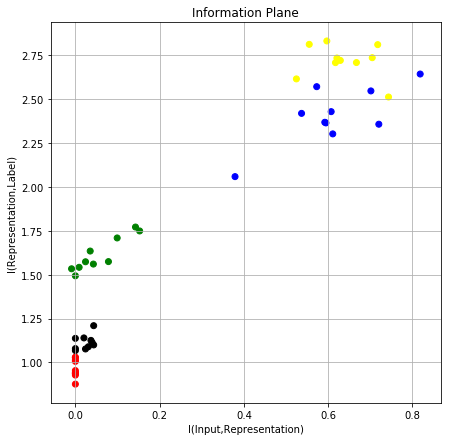

In [ ]:
IB.plot(snp_400)

##### After 9000 epochs

In [ ]:
snp_9000 = make_plane(
    10, hidden_units, ["black", "red", "green", "blue", "yellow"], 
    lambda x: fit_model(x, 9000)
)

0
Epoch 1/9000
1000/1000 [==============================] - 0s - loss: 2.0144     
Epoch 2/9000
1000/1000 [==============================] - 0s - loss: 1.3527     
Epoch 3/9000
1000/1000 [==============================] - 0s - loss: 1.2520     
Epoch 4/9000
1000/1000 [==============================] - 0s - loss: 1.0170     
Epoch 5/9000
1000/1000 [==============================] - 0s - loss: 0.8985     
Epoch 6/9000
1000/1000 [==============================] - 0s - loss: 0.7471     
Epoch 7/9000
1000/1000 [==============================] - 0s - loss: 0.7170     
Epoch 8/9000
1000/1000 [==============================] - 0s - loss: 0.6319     
Epoch 9/9000
1000/1000 [==============================] - 0s - loss: 0.6133     
Epoch 10/9000
1000/1000 [==============================] - 0s - loss: 0.5239     
Epoch 11/9000
1000/1000 [==============================] - 0s - loss: 0.4953     
Epoch 12/9000
1000/1000 [==============================] - 0s - loss: 0.4500     
Epoch 13/9000
1000/1000

1000/1000 [==============================] - 0s - loss: 0.0795     
Epoch 101/9000
1000/1000 [==============================] - 0s - loss: 0.0649     
Epoch 102/9000
1000/1000 [==============================] - 0s - loss: 0.0894     
Epoch 103/9000
1000/1000 [==============================] - 0s - loss: 0.0658     
Epoch 104/9000
1000/1000 [==============================] - 0s - loss: 0.0701     
Epoch 105/9000
1000/1000 [==============================] - 0s - loss: 0.0738     
Epoch 106/9000
1000/1000 [==============================] - 0s - loss: 0.0678     
Epoch 107/9000
1000/1000 [==============================] - 0s - loss: 0.0653     
Epoch 108/9000
1000/1000 [==============================] - 0s - loss: 0.0804     
Epoch 109/9000
1000/1000 [==============================] - 0s - loss: 0.0780     
Epoch 110/9000
1000/1000 [==============================] - 0s - loss: 0.0788     
Epoch 111/9000
1000/1000 [==============================] - 0s - loss: 0.0766     
Epoch 112/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0385     
Epoch 199/9000
1000/1000 [==============================] - 0s - loss: 0.0360     
Epoch 200/9000
1000/1000 [==============================] - 0s - loss: 0.0464     
Epoch 201/9000
1000/1000 [==============================] - 0s - loss: 0.0492     
Epoch 202/9000
1000/1000 [==============================] - 0s - loss: 0.0448     
Epoch 203/9000
1000/1000 [==============================] - 0s - loss: 0.0598     
Epoch 204/9000
1000/1000 [==============================] - 0s - loss: 0.0511     
Epoch 205/9000
1000/1000 [==============================] - 0s - loss: 0.0417     
Epoch 206/9000
1000/1000 [==============================] - 0s - loss: 0.0490     
Epoch 207/9000
1000/1000 [==============================] - 0s - loss: 0.0457     
Epoch 208/9000
1000/1000 [==============================] - 0s - loss: 0.0467     
Epoch 209/9000
1000/1000 [==============================] - 0s - loss: 0.0445     
Epoch 210/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0437     
Epoch 297/9000
1000/1000 [==============================] - 0s - loss: 0.0304     
Epoch 298/9000
1000/1000 [==============================] - 0s - loss: 0.0323     
Epoch 299/9000
1000/1000 [==============================] - 0s - loss: 0.0335     
Epoch 300/9000
1000/1000 [==============================] - 0s - loss: 0.0270     
Epoch 301/9000
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 302/9000
1000/1000 [==============================] - 0s - loss: 0.0253     
Epoch 303/9000
1000/1000 [==============================] - 0s - loss: 0.0326     
Epoch 304/9000
1000/1000 [==============================] - 0s - loss: 0.0283     
Epoch 305/9000
1000/1000 [==============================] - 0s - loss: 0.0254     
Epoch 306/9000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 307/9000
1000/1000 [==============================] - 0s - loss: 0.0268     
Epoch 308/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0208     
Epoch 395/9000
1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 396/9000
1000/1000 [==============================] - 0s - loss: 0.0313     
Epoch 397/9000
1000/1000 [==============================] - 0s - loss: 0.0242     
Epoch 398/9000
1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 399/9000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 400/9000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 401/9000
1000/1000 [==============================] - 0s - loss: 0.0195     
Epoch 402/9000
1000/1000 [==============================] - 0s - loss: 0.0261     
Epoch 403/9000
1000/1000 [==============================] - 0s - loss: 0.0238     
Epoch 404/9000
1000/1000 [==============================] - 0s - loss: 0.0210     
Epoch 405/9000
1000/1000 [==============================] - 0s - loss: 0.0194     
Epoch 406/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0242     
Epoch 493/9000
1000/1000 [==============================] - 0s - loss: 0.0251     
Epoch 494/9000
1000/1000 [==============================] - 0s - loss: 0.0207     
Epoch 495/9000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 496/9000
1000/1000 [==============================] - 0s - loss: 0.0264     
Epoch 497/9000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 498/9000
1000/1000 [==============================] - 0s - loss: 0.0266     
Epoch 499/9000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 500/9000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 501/9000
1000/1000 [==============================] - 0s - loss: 0.0228     
Epoch 502/9000
1000/1000 [==============================] - 0s - loss: 0.0180     
Epoch 503/9000
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 504/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 591/9000
1000/1000 [==============================] - 0s - loss: 0.0175     
Epoch 592/9000
1000/1000 [==============================] - 0s - loss: 0.0205     
Epoch 593/9000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 594/9000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 595/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 596/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 597/9000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 598/9000
1000/1000 [==============================] - 0s - loss: 0.0244     
Epoch 599/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 600/9000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 601/9000
1000/1000 [==============================] - 0s - loss: 0.0216     
Epoch 602/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 689/9000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 690/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 691/9000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 692/9000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 693/9000
1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 694/9000
1000/1000 [==============================] - 0s - loss: 0.0160     
Epoch 695/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 696/9000
1000/1000 [==============================] - 0s - loss: 0.0252     
Epoch 697/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 698/9000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 699/9000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 700/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 787/9000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 788/9000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 789/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 790/9000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 791/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 792/9000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 793/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 794/9000
1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 795/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 796/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 797/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 798/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 885/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 886/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 887/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 888/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 889/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 890/9000
1000/1000 [==============================] - 0s - loss: 0.0199     
Epoch 891/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 892/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 893/9000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 894/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 895/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 896/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 983/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 984/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 985/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 986/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 987/9000
1000/1000 [==============================] - 0s - loss: 0.0150     
Epoch 988/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 989/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 990/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 991/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 992/9000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 993/9000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 994/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1080/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1081/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1082/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 1083/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1084/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1085/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1086/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1087/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1088/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1089/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1090/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 10

1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 1177/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1178/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1179/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1180/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1181/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1182/9000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 1183/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1184/9000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 1185/9000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 1186/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 1187/9000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 11

1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1274/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1275/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1276/9000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 1277/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1278/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1279/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1280/9000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 1281/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 1282/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 1283/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 1284/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 12

1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 1371/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1372/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1373/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1374/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1375/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 1376/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1377/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1378/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1379/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1380/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 1381/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 13

1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 1468/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1469/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 1470/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1471/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 1472/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1473/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1474/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 1475/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1476/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 1477/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1478/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 14

1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1565/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1566/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1567/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1568/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.008 - 0s - loss: 0.0109     
Epoch 1569/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 1570/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1571/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1572/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 1573/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1574/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 1575/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 1662/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1663/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1664/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1665/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1666/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 1667/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1668/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1669/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1670/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1671/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1672/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 16

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 1759/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 1760/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1761/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1762/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1763/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1764/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1765/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 1766/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1767/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1768/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1769/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 17

1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 1856/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1857/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1858/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1859/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 1860/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 1861/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 1862/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1863/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1864/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1865/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1866/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 18

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 1953/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1954/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 1955/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1956/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 1957/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1958/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1959/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 1960/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 1961/9000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 1962/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1963/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 19

1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2050/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2051/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2052/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2053/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2054/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2055/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2056/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2057/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2058/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2059/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2060/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 20

1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2147/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 2148/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2149/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2150/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2151/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2152/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2153/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2154/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2155/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 2156/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2157/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 21

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2244/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 2245/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 2246/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2247/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2248/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2249/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 2250/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2251/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 2252/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2253/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2254/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 22

1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2341/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2342/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2343/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2344/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2345/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2346/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 2347/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 2348/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2349/9000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 2350/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2351/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 23

1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2438/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2439/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2440/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 2441/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 2442/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 2443/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2444/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 2445/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2446/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2447/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2448/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 24

1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2535/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2536/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 2537/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2538/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 2539/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2540/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2541/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 2542/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 2543/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2544/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 2545/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 25

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2632/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2633/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2634/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2635/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2636/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 2637/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2638/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2639/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2640/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2641/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 2642/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 26

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2729/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2730/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2731/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2732/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2733/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2734/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2735/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2736/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2737/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2738/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2739/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 27

1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2826/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2827/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2828/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2829/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2830/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2831/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2832/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 2833/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2834/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2835/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2836/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 28

1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2923/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 2924/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2925/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 2926/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 2927/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 2928/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 2929/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2930/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2931/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2932/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2933/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 29

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3020/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3021/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3022/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3023/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3024/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 3025/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3026/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 3027/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3028/9000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 3029/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 3030/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 30

1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3117/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 3118/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 3119/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3120/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3121/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3122/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 3123/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 3124/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 3125/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3126/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3127/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 31

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3214/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3215/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3216/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3217/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 3218/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 3219/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3220/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 3221/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 3222/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3223/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3224/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 32

1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3311/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 3312/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 3313/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3314/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3315/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3316/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3317/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3318/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3319/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3320/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3321/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 33

1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 3408/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 3409/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3410/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3411/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3412/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 3413/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 3414/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3415/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 3416/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3417/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3418/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 34

1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3505/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 3506/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 3507/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 3508/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 3509/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 3510/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3511/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3512/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3513/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 3514/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 3515/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 35

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3602/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3603/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 3604/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3605/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3606/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3607/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3608/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3609/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 3610/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3611/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3612/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 36

1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 3699/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3700/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 3701/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3702/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3703/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 3704/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3705/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3706/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3707/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3708/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3709/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 37

1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3796/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 3797/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3798/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3799/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3800/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 3801/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 3802/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 3803/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3804/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 3805/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3806/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 38

1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3893/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3894/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3895/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3896/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3897/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3898/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3899/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3900/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 3901/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3902/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3903/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 39

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3990/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3991/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3992/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3993/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3994/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3995/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 3996/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3997/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3998/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3999/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 4000/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 40

1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 4087/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 4088/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4089/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4090/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 4091/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4092/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4093/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4094/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 4095/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 4096/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4097/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 40

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 4184/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4185/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4186/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4187/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 4188/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4189/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4190/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4191/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 4192/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4193/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4194/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 41

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 4281/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4282/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4283/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4284/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4285/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4286/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 4287/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4288/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 4289/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4290/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4291/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 42

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4378/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4379/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4380/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 4381/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 4382/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 4383/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4384/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 4385/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4386/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 4387/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4388/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 43

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4475/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4476/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4477/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4478/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4479/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 4480/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 4481/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4482/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4483/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4484/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 4485/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 44

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4572/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 4573/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 4574/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4575/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 4576/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4577/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4578/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4579/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4580/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 4581/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4582/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 45

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4669/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4670/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4671/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4672/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4673/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4674/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4675/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4676/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4677/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 4678/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4679/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 46

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4766/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4767/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4768/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4769/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 4770/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4771/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4772/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4773/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4774/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 4775/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4776/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 47

1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 4863/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 4864/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4865/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4866/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4867/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4868/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4869/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 4870/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 4871/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4872/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4873/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 48

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4960/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4961/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4962/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4963/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4964/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 4965/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4966/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4967/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4968/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4969/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4970/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 49

1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 5057/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 5058/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 5059/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 5060/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5061/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5062/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 5063/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5064/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 5065/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5066/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 5067/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 50

1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5154/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 5155/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 5156/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5157/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 5158/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5159/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5160/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5161/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5162/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 5163/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 5164/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 51

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5251/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 5252/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 5253/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5254/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5255/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 5256/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 5257/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5258/9000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 5259/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5260/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5261/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 52

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5348/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5349/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 5350/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 5351/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5352/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 5353/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5354/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5355/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5356/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5357/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 5358/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 53

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5445/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5446/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5447/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5448/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5449/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5450/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5451/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5452/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5453/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5454/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5455/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 54

1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 5542/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5543/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5544/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5545/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5546/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5547/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5548/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5549/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 5550/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 5551/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5552/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 55

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5639/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5640/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5641/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5642/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5643/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5644/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5645/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5646/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 5647/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5648/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5649/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 56

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5736/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 5737/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 5738/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 5739/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 5740/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5741/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5742/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5743/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5744/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5745/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 5746/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 57

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5833/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5834/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 5835/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 5836/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5837/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5838/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5839/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5840/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5841/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5842/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5843/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 58

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5930/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5931/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 5932/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 5933/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 5934/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5935/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5936/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5937/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5938/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 5939/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5940/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 59

1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 6027/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 6028/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6029/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 6030/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6031/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 6032/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6033/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 6034/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 6035/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6036/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 6037/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 60

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6124/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 6125/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6126/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6127/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6128/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6129/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6130/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6131/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6132/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 6133/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6134/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 61

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6221/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6222/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6223/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6224/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 6225/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6226/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6227/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6228/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6229/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 6230/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6231/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 62

1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6318/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6319/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6320/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 6321/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6322/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6323/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6324/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6325/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6326/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6327/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6328/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 63

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6415/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6416/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6417/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6418/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6419/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6420/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6421/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6422/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 6423/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6424/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6425/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 64

1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6512/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6513/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6514/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6515/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6516/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6517/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6518/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6519/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6520/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6521/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6522/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 65

1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 6609/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6610/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 6611/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 6612/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6613/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6614/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6615/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 6616/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6617/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 6618/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6619/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 66

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 6706/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 6707/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6708/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6709/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6710/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6711/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6712/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6713/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6714/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6715/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6716/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 67

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6803/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6804/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6805/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6806/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6807/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 6808/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 6809/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6810/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 6811/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6812/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 6813/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 68

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6900/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 6901/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 6902/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6903/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6904/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6905/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6906/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6907/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6908/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6909/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 6910/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 69

1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6997/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6998/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 6999/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7000/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 7001/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7002/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 7003/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7004/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7005/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 7006/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7007/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 70

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7094/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 7095/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7096/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 7097/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 7098/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7099/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 7100/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7101/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 7102/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7103/9000
1000/1000 [==============================] - 0s - loss: 0.0033     
Epoch 7104/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 71

1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7191/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7192/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 7193/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7194/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7195/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 7196/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7197/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 7198/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 7199/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7200/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7201/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 72

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7288/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7289/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 7290/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 7291/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7292/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7293/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7294/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7295/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7296/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7297/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 7298/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 72

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7385/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7386/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7387/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 7388/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7389/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7390/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7391/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7392/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 7393/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7394/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7395/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 73

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7481/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 7482/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7483/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7484/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 7485/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 7486/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7487/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7488/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7489/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7490/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7491/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 74

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7578/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7579/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7580/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 7581/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 7582/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7583/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7584/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7585/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7586/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 7587/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7588/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 75

1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 7675/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7676/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 7677/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7678/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7679/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7680/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 7681/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7682/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7683/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7684/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 7685/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 76

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7772/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 7773/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7774/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7775/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7776/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7777/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7778/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7779/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 7780/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7781/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7782/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 77

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7869/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 7870/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 7871/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7872/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7873/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7874/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 7875/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 7876/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7877/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 7878/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7879/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 78

1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7966/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7967/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7968/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7969/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7970/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7971/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7972/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 7973/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 7974/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7975/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7976/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 79

1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8063/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8064/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8065/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 8066/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 8067/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8068/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8069/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8070/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 8071/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8072/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8073/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 80

1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 8160/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8161/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8162/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8163/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8164/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8165/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8166/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 8167/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 8168/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 8169/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8170/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 81

1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8257/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8258/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8259/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8260/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 8261/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8262/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8263/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8264/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8265/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 8266/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 8267/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 82

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8354/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8355/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8356/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8357/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8358/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8359/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8360/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8361/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8362/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8363/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 8364/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 83

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8451/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8452/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8453/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8454/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 8455/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 8456/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8457/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8458/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 8459/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 8460/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8461/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 84

1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8548/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8549/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8550/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 8551/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8552/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8553/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8554/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8555/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 8556/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 8557/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8558/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 85

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8645/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8646/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8647/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8648/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8649/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 8650/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 8651/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8652/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8653/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8654/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8655/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 86

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8742/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8743/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8744/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 8745/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8746/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8747/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8748/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8749/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8750/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8751/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8752/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 87

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8839/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8840/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8841/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8842/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 8843/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8844/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 8845/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 8846/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 8847/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8848/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8849/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 88

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8936/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8937/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8938/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8939/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8940/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 8941/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8942/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8943/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8944/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8945/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8946/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 89

1000/1000 [==============================] - 0s - loss: 0.1822     
Epoch 34/9000
1000/1000 [==============================] - 0s - loss: 0.1708     
Epoch 35/9000
1000/1000 [==============================] - 0s - loss: 0.1697     
Epoch 36/9000
1000/1000 [==============================] - 0s - loss: 0.1696     
Epoch 37/9000
1000/1000 [==============================] - 0s - loss: 0.1639     
Epoch 38/9000
1000/1000 [==============================] - 0s - loss: 0.1544     
Epoch 39/9000
1000/1000 [==============================] - 0s - loss: 0.1719     
Epoch 40/9000
1000/1000 [==============================] - 0s - loss: 0.1478     
Epoch 41/9000
1000/1000 [==============================] - 0s - loss: 0.1427     
Epoch 42/9000
1000/1000 [==============================] - 0s - loss: 0.1402     
Epoch 43/9000
1000/1000 [==============================] - 0s - loss: 0.1388     
Epoch 44/9000
1000/1000 [==============================] - 0s - loss: 0.1452     
Epoch 45/9000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0570     
Epoch 133/9000
1000/1000 [==============================] - 0s - loss: 0.0736     
Epoch 134/9000
1000/1000 [==============================] - 0s - loss: 0.0589     
Epoch 135/9000
1000/1000 [==============================] - 0s - loss: 0.0602     
Epoch 136/9000
1000/1000 [==============================] - 0s - loss: 0.0558     
Epoch 137/9000
1000/1000 [==============================] - 0s - loss: 0.0536     
Epoch 138/9000
1000/1000 [==============================] - 0s - loss: 0.0486     
Epoch 139/9000
1000/1000 [==============================] - 0s - loss: 0.0513     
Epoch 140/9000
1000/1000 [==============================] - 0s - loss: 0.0511     
Epoch 141/9000
1000/1000 [==============================] - 0s - loss: 0.0648     
Epoch 142/9000
1000/1000 [==============================] - 0s - loss: 0.0577     
Epoch 143/9000
1000/1000 [==============================] - 0s - loss: 0.0471     
Epoch 144/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0399     
Epoch 231/9000
1000/1000 [==============================] - 0s - loss: 0.0345     
Epoch 232/9000
1000/1000 [==============================] - 0s - loss: 0.0362     
Epoch 233/9000
1000/1000 [==============================] - 0s - loss: 0.0284     
Epoch 234/9000
1000/1000 [==============================] - 0s - loss: 0.0358     
Epoch 235/9000
1000/1000 [==============================] - 0s - loss: 0.0434     
Epoch 236/9000
1000/1000 [==============================] - 0s - loss: 0.0440     
Epoch 237/9000
1000/1000 [==============================] - 0s - loss: 0.0358     
Epoch 238/9000
1000/1000 [==============================] - 0s - loss: 0.0351     
Epoch 239/9000
1000/1000 [==============================] - 0s - loss: 0.0401     
Epoch 240/9000
1000/1000 [==============================] - 0s - loss: 0.0354     
Epoch 241/9000
1000/1000 [==============================] - 0s - loss: 0.0347     
Epoch 242/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0288     
Epoch 329/9000
1000/1000 [==============================] - 0s - loss: 0.0209     
Epoch 330/9000
1000/1000 [==============================] - 0s - loss: 0.0265     
Epoch 331/9000
1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 332/9000
1000/1000 [==============================] - 0s - loss: 0.0301     
Epoch 333/9000
1000/1000 [==============================] - 0s - loss: 0.0304     
Epoch 334/9000
1000/1000 [==============================] - 0s - loss: 0.0259     
Epoch 335/9000
1000/1000 [==============================] - 0s - loss: 0.0240     
Epoch 336/9000
1000/1000 [==============================] - 0s - loss: 0.0226     
Epoch 337/9000
1000/1000 [==============================] - 0s - loss: 0.0227     
Epoch 338/9000
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 339/9000
1000/1000 [==============================] - 0s - loss: 0.0335     
Epoch 340/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0195     
Epoch 427/9000
1000/1000 [==============================] - 0s - loss: 0.0231     
Epoch 428/9000
1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 429/9000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 430/9000
1000/1000 [==============================] - 0s - loss: 0.0265     
Epoch 431/9000
1000/1000 [==============================] - 0s - loss: 0.0211     
Epoch 432/9000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 433/9000
1000/1000 [==============================] - 0s - loss: 0.0272     
Epoch 434/9000
1000/1000 [==============================] - 0s - loss: 0.0276     
Epoch 435/9000
1000/1000 [==============================] - 0s - loss: 0.0244     
Epoch 436/9000
1000/1000 [==============================] - 0s - loss: 0.0245     
Epoch 437/9000
1000/1000 [==============================] - 0s - loss: 0.0253     
Epoch 438/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0261     
Epoch 525/9000
1000/1000 [==============================] - 0s - loss: 0.0198     
Epoch 526/9000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 527/9000
1000/1000 [==============================] - 0s - loss: 0.0218     
Epoch 528/9000
1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 529/9000
1000/1000 [==============================] - 0s - loss: 0.0228     
Epoch 530/9000
1000/1000 [==============================] - 0s - loss: 0.0236     
Epoch 531/9000
1000/1000 [==============================] - 0s - loss: 0.0264     
Epoch 532/9000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 533/9000
1000/1000 [==============================] - 0s - loss: 0.0202     
Epoch 534/9000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 535/9000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 536/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 623/9000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 624/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 625/9000
1000/1000 [==============================] - 0s - loss: 0.0202     
Epoch 626/9000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 627/9000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 628/9000
1000/1000 [==============================] - 0s - loss: 0.0238     
Epoch 629/9000
1000/1000 [==============================] - 0s - loss: 0.0150     
Epoch 630/9000
1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 631/9000
1000/1000 [==============================] - 0s - loss: 0.0166     
Epoch 632/9000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 633/9000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 634/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 721/9000
1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 722/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 723/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 724/9000
1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 725/9000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 726/9000
1000/1000 [==============================] - 0s - loss: 0.0219     
Epoch 727/9000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 728/9000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 729/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 730/9000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 731/9000
1000/1000 [==============================] - 0s - loss: 0.0187     
Epoch 732/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 819/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 820/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 821/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 822/9000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 823/9000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 824/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 825/9000
1000/1000 [==============================] - 0s - loss: 0.0116     - ETA: 0s - loss: 0.012
Epoch 826/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 827/9000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 828/9000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 829/9000
1000/1000 [==============================] - 0s - loss: 0.0112  

1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 917/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 918/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 919/9000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 920/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 921/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 922/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 923/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 924/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 925/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 926/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 927/9000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 928/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1015/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1016/9000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 1017/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 1018/9000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 1019/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1020/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1021/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 1022/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1023/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1024/9000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 1025/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 10

1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 1112/9000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 1113/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 1114/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1115/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1116/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1117/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1118/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1119/9000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 1120/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 1121/9000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 1122/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 11

1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1209/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 1210/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1211/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1212/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1213/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 1214/9000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 1215/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1216/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1217/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1218/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1219/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 12

1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1306/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1307/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1308/9000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 1309/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1310/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1311/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1312/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1313/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1314/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1315/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1316/9000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 13

1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1403/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1404/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1405/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1406/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1407/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1408/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1409/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 1410/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1411/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1412/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1413/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 14

1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1500/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1501/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1502/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 1503/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1504/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1505/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 1506/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 1507/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1508/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1509/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1510/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 15

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 1597/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 1598/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 1599/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1600/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1601/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1602/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1603/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 1604/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 1605/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1606/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 1607/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 16

1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1694/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1695/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1696/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1697/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1698/9000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 1699/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1700/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 1701/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1702/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1703/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1704/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 17

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1791/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 1792/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1793/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1794/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1795/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1796/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1797/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 1798/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 1799/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1800/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 1801/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 18

1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1888/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1889/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 1890/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1891/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1892/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 1893/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 1894/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 1895/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1896/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1897/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1898/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 18

1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 1985/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1986/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1987/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 1988/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1989/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1990/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 1991/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 1992/9000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 1993/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1994/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1995/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 19

1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2082/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2083/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2084/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2085/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2086/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 2087/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 2088/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2089/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2090/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2091/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2092/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 20

1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 2179/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2180/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2181/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2182/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2183/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 2184/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 2185/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2186/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2187/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2188/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2189/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 21

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2276/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2277/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2278/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 2279/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2280/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 2281/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 2282/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2283/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2284/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2285/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2286/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 22

1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2373/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2374/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2375/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2376/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2377/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2378/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 2379/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2380/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 2381/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2382/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 2383/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 23

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2470/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2471/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 2472/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2473/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2474/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 2475/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2476/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 2477/9000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 2478/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2479/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 2480/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 24

1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2567/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2568/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2569/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2570/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2571/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2572/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2573/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 2574/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2575/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2576/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2577/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 25

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2664/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 2665/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2666/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2667/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2668/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 2669/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2670/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2671/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 2672/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2673/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2674/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 26

1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2761/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2762/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2763/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2764/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2765/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2766/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 2767/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2768/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2769/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 2770/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2771/9000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 27

1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2858/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2859/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2860/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 2861/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 2862/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2863/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2864/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2865/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2866/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2867/9000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 2868/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 28

1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 2955/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2956/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2957/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2958/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2959/9000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 2960/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2961/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2962/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2963/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2964/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2965/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 29

1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3052/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3053/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 3054/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3055/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 3056/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3057/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 3058/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 3059/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3060/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3061/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3062/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 30

1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 3149/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3150/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3151/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3152/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3153/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3154/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3155/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3156/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3157/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3158/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3159/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 31

1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3246/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3247/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 3248/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3249/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3250/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3251/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3252/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3253/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 3254/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 3255/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3256/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 32

1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3343/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3344/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3345/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3346/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3347/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 3348/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3349/9000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 3350/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 3351/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 3352/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3353/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 33

1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 3440/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3441/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3442/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3443/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3444/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3445/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3446/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 3447/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3448/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3449/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3450/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 34

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3537/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 3538/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3539/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3540/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3541/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 3542/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3543/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 3544/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3545/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3546/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 3547/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 35

1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 3634/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3635/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 3636/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3637/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3638/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3639/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3640/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3641/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3642/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 3643/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3644/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 36

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3731/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3732/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 3733/9000
1000/1000 [==============================] - 0s - loss: 0.0052     - ETA: 0s - loss: 0.004
Epoch 3734/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3735/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3736/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3737/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3738/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 3739/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3740/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 3741/9000
1000/1000 [==============================] - 0s - los

1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 3828/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3829/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3830/9000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 3831/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 3832/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3833/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3834/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3835/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3836/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 3837/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 3838/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 38

1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3925/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3926/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3927/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3928/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 3929/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 3930/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3931/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3932/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 3933/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3934/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3935/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 39

1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 4022/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 4023/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4024/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4025/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 4026/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4027/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 4028/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4029/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4030/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4031/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4032/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 40

1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4119/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4120/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 4121/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4122/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4123/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4124/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4125/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 4126/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4127/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4128/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4129/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 41

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4216/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4217/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4218/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 4219/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 4220/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4221/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4222/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 4223/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4224/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4225/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4226/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 42

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4313/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4314/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4315/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4316/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4317/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4318/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 4319/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4320/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4321/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4322/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4323/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 43

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4410/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 4411/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4412/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 4413/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4414/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 4415/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4416/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4417/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4418/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4419/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 4420/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 44

1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 4507/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4508/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 4509/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4510/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 4511/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 4512/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4513/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4514/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4515/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4516/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 4517/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 45

1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 4604/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4605/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4606/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4607/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4608/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4609/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 4610/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4611/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 4612/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4613/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4614/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 46

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4701/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4702/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4703/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 4704/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4705/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4706/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4707/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4708/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4709/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4710/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4711/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 47

1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 4798/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 4799/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 4800/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 4801/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4802/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4803/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4804/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4805/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4806/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4807/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4808/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 48

1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4895/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4896/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4897/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4898/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 4899/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4900/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 4901/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4902/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 4903/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4904/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4905/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 49

1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4992/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 4993/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 4994/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4995/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4996/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 4997/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4998/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4999/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 5000/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5001/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 5002/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 50

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 5089/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5090/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5091/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5092/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 5093/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 5094/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 5095/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 5096/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5097/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5098/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 5099/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 51

1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5186/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5187/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5188/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5189/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5190/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5191/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5192/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5193/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5194/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5195/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5196/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 51

1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 5283/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 5284/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5285/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5286/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5287/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5288/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5289/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5290/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 5291/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 5292/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5293/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 52

1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5380/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5381/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5382/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 5383/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5384/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 5385/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5386/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 5387/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5388/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 5389/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 5390/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 53

1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5477/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 5478/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5479/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5480/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5481/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 5482/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5483/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5484/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5485/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 5486/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5487/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 54

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5574/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5575/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 5576/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5577/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5578/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5579/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5580/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5581/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5582/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 5583/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 5584/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 55

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5671/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5672/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5673/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 5674/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5675/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5676/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5677/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 5678/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5679/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5680/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5681/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 56

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 5768/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 5769/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 5770/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5771/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 5772/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5773/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5774/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5775/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5776/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5777/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 5778/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 57

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5865/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 5866/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 5867/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5868/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5869/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5870/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5871/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5872/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5873/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5874/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5875/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 58

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5962/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5963/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5964/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5965/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5966/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5967/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5968/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5969/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5970/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5971/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 5972/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 59

1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6059/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 6060/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6061/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6062/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 6063/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6064/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 6065/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6066/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 6067/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6068/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6069/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 60

1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 6156/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 6157/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 6158/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6159/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6160/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6161/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6162/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6163/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 6164/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6165/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6166/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 61

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6253/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6254/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6255/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6256/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6257/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6258/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6259/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6260/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 6261/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6262/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6263/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 62

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6350/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6351/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 6352/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6353/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 6354/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 6355/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6356/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6357/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6358/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6359/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6360/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 63

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6447/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 6448/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 6449/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 6450/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6451/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6452/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6453/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6454/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6455/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6456/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 6457/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 64

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6544/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6545/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 6546/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6547/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 6548/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 6549/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6550/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6551/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 6552/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6553/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6554/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 65

1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 6641/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6642/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6643/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6644/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 6645/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6646/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6647/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6648/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6649/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6650/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6651/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 66

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6738/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 6739/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6740/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6741/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6742/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6743/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6744/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 6745/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6746/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6747/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6748/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 67

1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6835/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6836/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 6837/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 6838/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6839/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6840/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 6841/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6842/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6843/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6844/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6845/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 68

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6932/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6933/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6934/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6935/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6936/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6937/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6938/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 6939/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6940/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 6941/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 6942/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 69

1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7029/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7030/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7031/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 7032/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 7033/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 7034/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7035/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 7036/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7037/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 7038/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7039/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 70

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7126/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7127/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7128/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7129/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7130/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7131/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7132/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7133/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7134/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7135/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 7136/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 71

1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 7223/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 7224/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7225/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7226/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7227/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7228/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 7229/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7230/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7231/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7232/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7233/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 72

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7320/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7321/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7322/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7323/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7324/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 7325/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 7326/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7327/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7328/9000
1000/1000 [==============================] - 0s - loss: 0.0049     - ETA: 0s - loss: 0.00
Epoch 7329/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 7330/9000
1000/1000 [==============================] - 0s - loss

1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7417/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7418/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 7419/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7420/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7421/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7422/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7423/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 7424/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7425/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7426/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 7427/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 74

1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 7514/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7515/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7516/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7517/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.009 - 0s - loss: 0.0077     
Epoch 7518/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7519/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7520/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 7521/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 7522/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 7523/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 7524/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 7611/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7612/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 7613/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7614/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7615/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 7616/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7617/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 7618/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7619/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7620/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7621/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 76

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7708/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7709/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7710/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7711/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7712/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7713/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 7714/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7715/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 7716/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7717/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7718/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 77

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7805/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7806/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7807/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7808/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7809/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7810/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7811/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 7812/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 7813/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7814/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7815/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 78

1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 7902/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7903/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7904/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7905/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7906/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7907/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 7908/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7909/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 7910/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7911/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7912/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 79

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7999/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8000/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 8001/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8002/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8003/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8004/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8005/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 8006/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8007/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8008/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 8009/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 80

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8096/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 8097/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8098/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 8099/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 8100/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8101/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8102/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8103/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8104/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 8105/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 8106/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 81

1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8193/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8194/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8195/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8196/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8197/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8198/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8199/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8200/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8201/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8202/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 8203/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 82

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8290/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8291/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8292/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8293/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 8294/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 8295/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8296/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8297/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 8298/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8299/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 8300/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 83

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8387/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8388/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8389/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8390/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 8391/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8392/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8393/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8394/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8395/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8396/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8397/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 83

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8484/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8485/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8486/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8487/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8488/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 8489/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 8490/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 8491/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8492/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8493/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 8494/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 84

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8581/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8582/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8583/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8584/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8585/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 8586/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 8587/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 8588/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8589/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8590/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8591/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 85

1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 8678/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 8679/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8680/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8681/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8682/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8683/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 8684/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8685/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 8686/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 8687/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8688/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 86

1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8775/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 8776/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8777/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8778/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 8779/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8780/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8781/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8782/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8783/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8784/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8785/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 87

1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8872/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8873/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8874/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8875/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8876/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 8877/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8878/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8879/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8880/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8881/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 8882/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 88

1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 8969/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 8970/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 8971/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 8972/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8973/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8974/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8975/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8976/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 8977/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8978/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8979/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 89

1000/1000 [==============================] - 0s - loss: 0.1155     
Epoch 68/9000
1000/1000 [==============================] - 0s - loss: 0.1200     
Epoch 69/9000
1000/1000 [==============================] - 0s - loss: 0.1130     
Epoch 70/9000
1000/1000 [==============================] - 0s - loss: 0.1235     
Epoch 71/9000
1000/1000 [==============================] - 0s - loss: 0.0978     
Epoch 72/9000
1000/1000 [==============================] - 0s - loss: 0.1021     
Epoch 73/9000
1000/1000 [==============================] - 0s - loss: 0.1226     
Epoch 74/9000
1000/1000 [==============================] - 0s - loss: 0.1003     
Epoch 75/9000
1000/1000 [==============================] - 0s - loss: 0.1153     
Epoch 76/9000
1000/1000 [==============================] - 0s - loss: 0.1184     
Epoch 77/9000
1000/1000 [==============================] - 0s - loss: 0.0985     
Epoch 78/9000
1000/1000 [==============================] - 0s - loss: 0.1137     
Epoch 79/9000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0619     
Epoch 167/9000
1000/1000 [==============================] - 0s - loss: 0.0574     
Epoch 168/9000
1000/1000 [==============================] - 0s - loss: 0.0624     
Epoch 169/9000
1000/1000 [==============================] - 0s - loss: 0.0627     
Epoch 170/9000
1000/1000 [==============================] - 0s - loss: 0.0574     
Epoch 171/9000
1000/1000 [==============================] - 0s - loss: 0.0600     
Epoch 172/9000
1000/1000 [==============================] - 0s - loss: 0.0557     
Epoch 173/9000
1000/1000 [==============================] - 0s - loss: 0.0542     
Epoch 174/9000
1000/1000 [==============================] - 0s - loss: 0.0602     
Epoch 175/9000
1000/1000 [==============================] - 0s - loss: 0.0551     
Epoch 176/9000
1000/1000 [==============================] - 0s - loss: 0.0659     
Epoch 177/9000
1000/1000 [==============================] - 0s - loss: 0.0576     
Epoch 178/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0457     
Epoch 265/9000
1000/1000 [==============================] - 0s - loss: 0.0449     
Epoch 266/9000
1000/1000 [==============================] - 0s - loss: 0.0419     
Epoch 267/9000
1000/1000 [==============================] - 0s - loss: 0.0366     
Epoch 268/9000
1000/1000 [==============================] - 0s - loss: 0.0340     
Epoch 269/9000
1000/1000 [==============================] - 0s - loss: 0.0323     
Epoch 270/9000
1000/1000 [==============================] - 0s - loss: 0.0346     
Epoch 271/9000
1000/1000 [==============================] - 0s - loss: 0.0337     
Epoch 272/9000
1000/1000 [==============================] - 0s - loss: 0.0326     
Epoch 273/9000
1000/1000 [==============================] - 0s - loss: 0.0292     
Epoch 274/9000
1000/1000 [==============================] - 0s - loss: 0.0291     
Epoch 275/9000
1000/1000 [==============================] - 0s - loss: 0.0314     
Epoch 276/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0256     
Epoch 363/9000
1000/1000 [==============================] - 0s - loss: 0.0304     
Epoch 364/9000
1000/1000 [==============================] - 0s - loss: 0.0302     
Epoch 365/9000
1000/1000 [==============================] - 0s - loss: 0.0257     
Epoch 366/9000
1000/1000 [==============================] - 0s - loss: 0.0220     
Epoch 367/9000
1000/1000 [==============================] - 0s - loss: 0.0224     
Epoch 368/9000
1000/1000 [==============================] - 0s - loss: 0.0269     
Epoch 369/9000
1000/1000 [==============================] - 0s - loss: 0.0220     
Epoch 370/9000
1000/1000 [==============================] - 0s - loss: 0.0205     
Epoch 371/9000
1000/1000 [==============================] - 0s - loss: 0.0194     
Epoch 372/9000
1000/1000 [==============================] - 0s - loss: 0.0238     
Epoch 373/9000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 374/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0274     
Epoch 461/9000
1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 462/9000
1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 463/9000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 464/9000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 465/9000
1000/1000 [==============================] - 0s - loss: 0.0273     
Epoch 466/9000
1000/1000 [==============================] - 0s - loss: 0.0250     
Epoch 467/9000
1000/1000 [==============================] - 0s - loss: 0.0216     
Epoch 468/9000
1000/1000 [==============================] - 0s - loss: 0.0204     
Epoch 469/9000
1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 470/9000
1000/1000 [==============================] - 0s - loss: 0.0214     
Epoch 471/9000
1000/1000 [==============================] - 0s - loss: 0.0241     
Epoch 472/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0205     
Epoch 559/9000
1000/1000 [==============================] - 0s - loss: 0.0211     
Epoch 560/9000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 561/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 562/9000
1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 563/9000
1000/1000 [==============================] - 0s - loss: 0.0194     
Epoch 564/9000
1000/1000 [==============================] - 0s - loss: 0.0212     
Epoch 565/9000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 566/9000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 567/9000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 568/9000
1000/1000 [==============================] - 0s - loss: 0.0194     
Epoch 569/9000
1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 570/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 657/9000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 658/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 659/9000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 660/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 661/9000
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 662/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 663/9000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 664/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 665/9000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 666/9000
1000/1000 [==============================] - 0s - loss: 0.0214     
Epoch 667/9000
1000/1000 [==============================] - 0s - loss: 0.0167     
Epoch 668/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 755/9000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 756/9000
1000/1000 [==============================] - 0s - loss: 0.0166     
Epoch 757/9000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 758/9000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 759/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 760/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 761/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 762/9000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 763/9000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 764/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 765/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 766/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 853/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 854/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 855/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 856/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 857/9000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 858/9000
1000/1000 [==============================] - 0s - loss: 0.0181     
Epoch 859/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 860/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 861/9000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 862/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 863/9000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 864/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 951/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 952/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 953/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 954/9000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 955/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 956/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 957/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 958/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 959/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 960/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 961/9000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 962/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1049/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 1050/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1051/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 1052/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 1053/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 1054/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 1055/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1056/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1057/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1058/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1059/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 10

1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1146/9000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 1147/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 1148/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1149/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1150/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1151/9000
1000/1000 [==============================] - 0s - loss: 0.0210     
Epoch 1152/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 1153/9000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 1154/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1155/9000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 1156/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 11

1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1243/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1244/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1245/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1246/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1247/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1248/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1249/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1250/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1251/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1252/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1253/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 12

1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 1340/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1341/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1342/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1343/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1344/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1345/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1346/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1347/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1348/9000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 1349/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1350/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 13

1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1437/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1438/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1439/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 1440/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1441/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1442/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1443/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1444/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 1445/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1446/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1447/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 14

1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1534/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1535/9000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 1536/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 1537/9000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 1538/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1539/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1540/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1541/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1542/9000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 1543/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 1544/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 15

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1631/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1632/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1633/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1634/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1635/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 1636/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1637/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1638/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1639/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1640/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1641/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 16

1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 1728/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 1729/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1730/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1731/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 1732/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1733/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 1734/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 1735/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 1736/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1737/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1738/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 17

1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 1825/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1826/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1827/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1828/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1829/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 1830/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1831/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 1832/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 1833/9000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 1834/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1835/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 18

1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 1922/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1923/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1924/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1925/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1926/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1927/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1928/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1929/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1930/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1931/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 1932/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 19

1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2019/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2020/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2021/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2022/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2023/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2024/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2025/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2026/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2027/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 2028/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2029/9000
1000/1000 [==============================] - 0s - loss: 0.0143     - ETA: 0s

1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 2116/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2117/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2118/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2119/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2120/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2121/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 2122/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2123/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2124/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2125/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2126/9000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 21

1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 2213/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2214/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 2215/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 2216/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2217/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2218/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 2219/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2220/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2221/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2222/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2223/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 22

1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 2310/9000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 2311/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2312/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2313/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2314/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2315/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2316/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 2317/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 2318/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 2319/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2320/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 23

1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2407/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2408/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 2409/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2410/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 2411/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 2412/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2413/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2414/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2415/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2416/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2417/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 24

1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 2504/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2505/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2506/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2507/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 2508/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 2509/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 2510/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2511/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2512/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2513/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2514/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 25

1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2601/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2602/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 2603/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2604/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2605/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2606/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2607/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2608/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2609/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2610/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2611/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 26

1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2698/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2699/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2700/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2701/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2702/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2703/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2704/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2705/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 2706/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2707/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2708/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 27

1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2795/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 2796/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2797/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2798/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2799/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2800/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 2801/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2802/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 2803/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 2804/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 2805/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 28

1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 2892/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2893/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 2894/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 2895/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2896/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2897/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2898/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2899/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 2900/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2901/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2902/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 29

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2989/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2990/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2991/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2992/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2993/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2994/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2995/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2996/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2997/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 2998/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2999/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 30

1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3086/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3087/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3088/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3089/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3090/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3091/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3092/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3093/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 3094/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3095/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 3096/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 30

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3183/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 3184/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 3185/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 3186/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 3187/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 3188/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 3189/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3190/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3191/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3192/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3193/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 31

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3280/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 3281/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 3282/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3283/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3284/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3285/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3286/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3287/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3288/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 3289/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 3290/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 32

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3377/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3378/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3379/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3380/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3381/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3382/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3383/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3384/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3385/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3386/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3387/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 33

1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 3474/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 3475/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 3476/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 3477/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3478/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3479/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3480/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 3481/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 3482/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3483/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 3484/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 34

1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3571/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 3572/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 3573/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3574/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3575/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 3576/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 3577/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 3578/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3579/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3580/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3581/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 35

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3668/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3669/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3670/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3671/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3672/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3673/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3674/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3675/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 3676/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3677/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3678/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 36

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3765/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3766/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3767/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3768/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3769/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 3770/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 3771/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 3772/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3773/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 3774/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3775/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 37

1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 3862/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3863/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3864/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3865/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3866/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3867/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3868/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3869/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3870/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3871/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3872/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 38

1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3959/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3960/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3961/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3962/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3963/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3964/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3965/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3966/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 3967/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 3968/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3969/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 39

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4056/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4057/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4058/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 4059/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4060/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 4061/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4062/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4063/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4064/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4065/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 4066/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 40

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4153/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 4154/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4155/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4156/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4157/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4158/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4159/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 4160/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4161/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4162/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4163/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 41

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 4250/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4251/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4252/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4253/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4254/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4255/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4256/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 4257/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4258/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 4259/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 4260/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 42

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4347/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 4348/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4349/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 4350/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 4351/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4352/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4353/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4354/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 4355/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4356/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4357/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 43

1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4444/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4445/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 4446/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4447/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4448/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4449/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4450/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4451/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 4452/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4453/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4454/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 44

1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4541/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 4542/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4543/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4544/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4545/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4546/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4547/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 4548/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4549/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4550/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4551/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 45

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4638/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 4639/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4640/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4641/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4642/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4643/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 4644/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4645/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4646/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4647/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4648/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 46

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4735/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4736/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 4737/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 4738/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4739/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4740/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4741/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4742/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 4743/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 4744/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4745/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 47

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4832/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4833/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4834/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4835/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4836/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 4837/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4838/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4839/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 4840/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 4841/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 4842/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 48

1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4929/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4930/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4931/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 4932/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4933/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 4934/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4935/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4936/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4937/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4938/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4939/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 49

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5026/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5027/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5028/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.005 - 0s - loss: 0.0055     
Epoch 5029/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 5030/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5031/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 5032/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 5033/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5034/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5035/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 5036/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5123/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 5124/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 5125/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5126/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5127/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5128/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5129/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5130/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5131/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 5132/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 5133/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 51

1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5220/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5221/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5222/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5223/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5224/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5225/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5226/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5227/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5228/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5229/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5230/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 52

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5317/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5318/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 5319/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5320/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5321/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5322/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5323/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5324/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 5325/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5326/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5327/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 53

1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5414/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5415/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5416/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5417/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5418/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 5419/9000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 5420/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5421/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5422/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5423/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5424/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 54

1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5511/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 5512/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 5513/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 5514/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 5515/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 5516/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5517/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5518/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5519/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5520/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5521/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 55

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5608/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5609/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 5610/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 5611/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5612/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5613/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5614/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 5615/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5616/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5617/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5618/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 56

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 5705/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5706/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5707/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5708/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5709/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5710/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5711/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5712/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5713/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5714/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5715/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 57

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5802/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 5803/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5804/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5805/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5806/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5807/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 5808/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5809/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5810/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5811/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5812/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 58

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5899/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5900/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 5901/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5902/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5903/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5904/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5905/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5906/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5907/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5908/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 5909/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 59

1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 5996/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5997/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5998/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5999/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6000/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6001/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6002/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6003/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6004/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6005/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 6006/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 60

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 6093/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6094/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6095/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6096/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 6097/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6098/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6099/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6100/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6101/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6102/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 6103/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 61

1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6190/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 6191/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6192/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6193/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 6194/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 6195/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6196/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6197/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 6198/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6199/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6200/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 62

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6287/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6288/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6289/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6290/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6291/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6292/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6293/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6294/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6295/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6296/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6297/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 62

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6384/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6385/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6386/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6387/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6388/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6389/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6390/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6391/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6392/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6393/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 6394/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 63

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6481/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6482/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6483/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 6484/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6485/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6486/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6487/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6488/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6489/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6490/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 6491/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 64

1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6578/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6579/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 6580/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6581/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6582/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6583/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6584/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6585/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 6586/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6587/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 6588/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 65

1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6675/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6676/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6677/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6678/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6679/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6680/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6681/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6682/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6683/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 6684/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6685/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 66

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6772/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6773/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6774/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6775/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6776/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6777/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 6778/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6779/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 6780/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6781/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6782/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 67

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6869/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 6870/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6871/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6872/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 6873/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6874/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6875/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6876/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6877/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6878/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 6879/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 68

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6966/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6967/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6968/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6969/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6970/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 6971/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6972/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 6973/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.007 - 0s - loss: 0.0076     
Epoch 6974/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 6975/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6976/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7063/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7064/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 7065/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 7066/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7067/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 7068/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 7069/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7070/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7071/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7072/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 7073/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 70

1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7160/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7161/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7162/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7163/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7164/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7165/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7166/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7167/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7168/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7169/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7170/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 71

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7257/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7258/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7259/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 7260/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7261/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7262/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7263/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7264/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7265/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7266/9000
1000/1000 [==============================] - 0s - loss: 0.0036     
Epoch 7267/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 72

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7354/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7355/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 7356/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.006 - 0s - loss: 0.0054     
Epoch 7357/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7358/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7359/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7360/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 7361/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7362/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 7363/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7364/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7451/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7452/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7453/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7454/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7455/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7456/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7457/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7458/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7459/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7460/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7461/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 74

1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7548/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7549/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7550/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 7551/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7552/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7553/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7554/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7555/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7556/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7557/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7558/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 75

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7645/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7646/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7647/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 7648/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 7649/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7650/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7651/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7652/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7653/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 7654/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7655/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 76

1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 7742/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 7743/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7744/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 7745/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7746/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7747/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7748/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7749/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7750/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7751/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7752/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 77

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7839/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7840/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7841/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7842/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 7843/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7844/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7845/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7846/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7847/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 7848/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7849/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 78

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7936/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7937/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7938/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7939/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7940/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7941/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7942/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 7943/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7944/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7945/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7946/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 79

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8033/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8034/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8035/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8036/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8037/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8038/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 8039/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 8040/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 8041/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8042/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8043/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 80

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8130/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8131/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8132/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 8133/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8134/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8135/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 8136/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8137/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8138/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8139/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 8140/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 81

1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8227/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8228/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8229/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8230/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8231/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8232/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 8233/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 8234/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8235/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8236/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8237/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 82

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8324/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8325/9000
1000/1000 [==============================] - 0s - loss: 0.0036     
Epoch 8326/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 8327/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8328/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8329/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8330/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8331/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8332/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8333/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8334/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 83

1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8421/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8422/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8423/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8424/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8425/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 8426/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 8427/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8428/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8429/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8430/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8431/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 84

1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 8518/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8519/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8520/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 8521/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8522/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8523/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8524/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 8525/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 8526/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8527/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8528/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 85

1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 8615/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8616/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8617/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8618/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 8619/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 8620/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 8621/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8622/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8623/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8624/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8625/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 86

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8712/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8713/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8714/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8715/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8716/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8717/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 8718/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 8719/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8720/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8721/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8722/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 87

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8809/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8810/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 8811/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8812/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8813/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8814/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8815/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8816/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8817/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8818/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8819/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 88

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8906/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8907/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8908/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8909/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8910/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8911/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 8912/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 8913/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8914/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 8915/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 8916/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 89

1000/1000 [==============================] - 0s - loss: 1.3618     
Epoch 3/9000
1000/1000 [==============================] - 0s - loss: 1.1166     
Epoch 4/9000
1000/1000 [==============================] - 0s - loss: 0.9564     
Epoch 5/9000
1000/1000 [==============================] - 0s - loss: 0.8528     
Epoch 6/9000
1000/1000 [==============================] - 0s - loss: 0.8266     
Epoch 7/9000
1000/1000 [==============================] - 0s - loss: 0.6874     
Epoch 8/9000
1000/1000 [==============================] - 0s - loss: 0.5973     
Epoch 9/9000
1000/1000 [==============================] - 0s - loss: 0.5753     
Epoch 10/9000
1000/1000 [==============================] - 0s - loss: 0.5405     
Epoch 11/9000
1000/1000 [==============================] - 0s - loss: 0.4805     
Epoch 12/9000
1000/1000 [==============================] - 0s - loss: 0.4642     
Epoch 13/9000
1000/1000 [==============================] - 0s - loss: 0.3863     
Epoch 14/9000
1000/1000 [============

1000/1000 [==============================] - 0s - loss: 0.0673     
Epoch 103/9000
1000/1000 [==============================] - 0s - loss: 0.0773     
Epoch 104/9000
1000/1000 [==============================] - 0s - loss: 0.0589     
Epoch 105/9000
1000/1000 [==============================] - 0s - loss: 0.0716     
Epoch 106/9000
1000/1000 [==============================] - 0s - loss: 0.0541     
Epoch 107/9000
1000/1000 [==============================] - 0s - loss: 0.0656     
Epoch 108/9000
1000/1000 [==============================] - 0s - loss: 0.0606     
Epoch 109/9000
1000/1000 [==============================] - 0s - loss: 0.0683     
Epoch 110/9000
1000/1000 [==============================] - 0s - loss: 0.0741     
Epoch 111/9000
1000/1000 [==============================] - 0s - loss: 0.0670     
Epoch 112/9000
1000/1000 [==============================] - 0s - loss: 0.0670     
Epoch 113/9000
1000/1000 [==============================] - 0s - loss: 0.0652     
Epoch 114/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0451     
Epoch 201/9000
1000/1000 [==============================] - 0s - loss: 0.0360     
Epoch 202/9000
1000/1000 [==============================] - 0s - loss: 0.0414     
Epoch 203/9000
1000/1000 [==============================] - 0s - loss: 0.0423     
Epoch 204/9000
1000/1000 [==============================] - 0s - loss: 0.0407     
Epoch 205/9000
1000/1000 [==============================] - 0s - loss: 0.0399     
Epoch 206/9000
1000/1000 [==============================] - 0s - loss: 0.0355     
Epoch 207/9000
1000/1000 [==============================] - 0s - loss: 0.0379     
Epoch 208/9000
1000/1000 [==============================] - 0s - loss: 0.0419     
Epoch 209/9000
1000/1000 [==============================] - 0s - loss: 0.0380     
Epoch 210/9000
1000/1000 [==============================] - 0s - loss: 0.0425     
Epoch 211/9000
1000/1000 [==============================] - 0s - loss: 0.0422     
Epoch 212/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0308     
Epoch 299/9000
1000/1000 [==============================] - 0s - loss: 0.0292     
Epoch 300/9000
1000/1000 [==============================] - 0s - loss: 0.0280     
Epoch 301/9000
1000/1000 [==============================] - 0s - loss: 0.0304     
Epoch 302/9000
1000/1000 [==============================] - 0s - loss: 0.0331     
Epoch 303/9000
1000/1000 [==============================] - 0s - loss: 0.0314     
Epoch 304/9000
1000/1000 [==============================] - 0s - loss: 0.0241     
Epoch 305/9000
1000/1000 [==============================] - 0s - loss: 0.0262     
Epoch 306/9000
1000/1000 [==============================] - 0s - loss: 0.0272     
Epoch 307/9000
1000/1000 [==============================] - 0s - loss: 0.0335     
Epoch 308/9000
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 309/9000
1000/1000 [==============================] - 0s - loss: 0.0224     
Epoch 310/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0247     - ETA: 0s - loss: 0.025
Epoch 397/9000
1000/1000 [==============================] - 0s - loss: 0.0251     
Epoch 398/9000
1000/1000 [==============================] - 0s - loss: 0.0218     
Epoch 399/9000
1000/1000 [==============================] - 0s - loss: 0.0274     
Epoch 400/9000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 401/9000
1000/1000 [==============================] - 0s - loss: 0.0261     
Epoch 402/9000
1000/1000 [==============================] - 0s - loss: 0.0203     
Epoch 403/9000
1000/1000 [==============================] - 0s - loss: 0.0229     
Epoch 404/9000
1000/1000 [==============================] - 0s - loss: 0.0238     
Epoch 405/9000
1000/1000 [==============================] - 0s - loss: 0.0214     
Epoch 406/9000
1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 407/9000
1000/1000 [==============================] - 0s - loss: 0.0192  

1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 495/9000
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 496/9000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 497/9000
1000/1000 [==============================] - 0s - loss: 0.0183     
Epoch 498/9000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 499/9000
1000/1000 [==============================] - 0s - loss: 0.0342     
Epoch 500/9000
1000/1000 [==============================] - 0s - loss: 0.0207     
Epoch 501/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 502/9000
1000/1000 [==============================] - 0s - loss: 0.0220     
Epoch 503/9000
1000/1000 [==============================] - 0s - loss: 0.0183     
Epoch 504/9000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 505/9000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 506/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 593/9000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 594/9000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 595/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 596/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 597/9000
1000/1000 [==============================] - 0s - loss: 0.0175     
Epoch 598/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 599/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 600/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 601/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 602/9000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 603/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 604/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0177     
Epoch 691/9000
1000/1000 [==============================] - 0s - loss: 0.0180     
Epoch 692/9000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 693/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 694/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 695/9000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 696/9000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 697/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 698/9000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 699/9000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 700/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 701/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 702/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 789/9000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 790/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 791/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 792/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 793/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 794/9000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 795/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 796/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 797/9000
1000/1000 [==============================] - 0s - loss: 0.0214     
Epoch 798/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 799/9000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 800/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 887/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 888/9000
1000/1000 [==============================] - 0s - loss: 0.0177     
Epoch 889/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 890/9000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 891/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 892/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 893/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 894/9000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 895/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 896/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 897/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 898/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 985/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 986/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 987/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 988/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 989/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 990/9000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 991/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 992/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 993/9000
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 994/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 995/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 996/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1082/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 1083/9000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 1084/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 1085/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1086/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1087/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 1088/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1089/9000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 1090/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 1091/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 1092/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 10

1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1179/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 1180/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1181/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1182/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1183/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1184/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1185/9000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 1186/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1187/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 1188/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 1189/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 11

1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 1276/9000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 1277/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1278/9000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 1279/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1280/9000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 1281/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 1282/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 1283/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 1284/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 1285/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1286/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 12

1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 1373/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1374/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1375/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1376/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1377/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 1378/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1379/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1380/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 1381/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1382/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1383/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 13

1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 1470/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 1471/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 1472/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 1473/9000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 1474/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1475/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1476/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1477/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1478/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1479/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1480/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 14

1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1567/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1568/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 1569/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1570/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1571/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 1572/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1573/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1574/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 1575/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1576/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1577/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 15

1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1664/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1665/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1666/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 1667/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1668/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1669/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 1670/9000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 1671/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1672/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1673/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 1674/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 16

1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1761/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 1762/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1763/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1764/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1765/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 1766/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 1767/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1768/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 1769/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1770/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 1771/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 17

1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1858/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 1859/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1860/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1861/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1862/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1863/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1864/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 1865/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1866/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1867/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1868/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 18

1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1955/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1956/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1957/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1958/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1959/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 1960/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1961/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1962/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1963/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1964/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 1965/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 19

1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 2052/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2053/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 2054/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2055/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2056/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 2057/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 2058/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 2059/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2060/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2061/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2062/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 20

1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 2149/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2150/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 2151/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2152/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2153/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2154/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 2155/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2156/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 2157/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 2158/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2159/9000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 21

1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2246/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2247/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2248/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2249/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2250/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2251/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 2252/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2253/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2254/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2255/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2256/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 22

1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2343/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2344/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2345/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2346/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2347/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2348/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2349/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 2350/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2351/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2352/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2353/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 23

1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2440/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2441/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2442/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2443/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2444/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2445/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2446/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2447/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2448/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2449/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2450/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 24

1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2537/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2538/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2539/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2540/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2541/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2542/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2543/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2544/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2545/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2546/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2547/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 25

1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 2634/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 2635/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2636/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2637/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2638/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2639/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2640/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2641/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2642/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2643/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2644/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 26

1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2731/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2732/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2733/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2734/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2735/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2736/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 2737/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2738/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2739/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2740/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2741/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 27

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2828/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2829/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 2830/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2831/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2832/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2833/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2834/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2835/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 2836/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2837/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2838/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 28

1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 2925/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 2926/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2927/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2928/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2929/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 2930/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 2931/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2932/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2933/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2934/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2935/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 29

1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3022/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3023/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3024/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3025/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 3026/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3027/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3028/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 3029/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 3030/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3031/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3032/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 30

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3119/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 3120/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3121/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3122/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3123/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3124/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3125/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3126/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 3127/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3128/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3129/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 31

1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3216/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3217/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3218/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3219/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3220/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3221/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3222/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3223/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 3224/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3225/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3226/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 32

1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3313/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3314/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 3315/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3316/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 3317/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3318/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3319/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 3320/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3321/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 3322/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3323/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 33

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3410/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 3411/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3412/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3413/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 3414/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3415/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3416/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3417/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3418/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3419/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3420/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 34

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3507/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 3508/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 3509/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 3510/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 3511/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 3512/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 3513/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3514/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3515/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3516/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3517/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 35

1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3604/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3605/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3606/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3607/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3608/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3609/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 3610/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3611/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 3612/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3613/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3614/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 36

1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3701/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3702/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3703/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3704/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3705/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 3706/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3707/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3708/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3709/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3710/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3711/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 37

1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 3798/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 3799/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3800/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3801/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 3802/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3803/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3804/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 3805/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3806/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 3807/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3808/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 38

1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 3895/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3896/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3897/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3898/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 3899/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 3900/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3901/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 3902/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3903/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3904/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 3905/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 39

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3992/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3993/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3994/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3995/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3996/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 3997/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3998/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 3999/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4000/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 4001/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4002/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 40

1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4089/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4090/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4091/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4092/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4093/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4094/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4095/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4096/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4097/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 4098/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4099/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 41

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4186/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 4187/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4188/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4189/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 4190/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4191/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4192/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 4193/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4194/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4195/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 4196/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 41

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4283/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4284/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4285/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4286/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4287/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4288/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4289/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4290/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4291/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 4292/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4293/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 42

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4380/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4381/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4382/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4383/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4384/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4385/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4386/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 4387/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4388/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4389/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4390/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 43

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4477/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4478/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4479/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4480/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4481/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4482/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4483/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 4484/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4485/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4486/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 4487/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 44

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4574/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4575/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 4576/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 4577/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4578/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4579/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 4580/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4581/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4582/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4583/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4584/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 45

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 4671/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4672/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 4673/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4674/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4675/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4676/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4677/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4678/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4679/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4680/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 4681/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 46

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4768/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4769/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4770/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4771/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4772/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4773/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4774/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4775/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 4776/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4777/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4778/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 47

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4865/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4866/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4867/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 4868/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4869/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4870/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4871/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 4872/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 4873/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4874/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 4875/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 48

1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4962/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4963/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4964/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4965/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 4966/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 4967/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4968/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 4969/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 4970/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4971/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4972/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 49

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5059/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5060/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5061/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5062/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 5063/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5064/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5065/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5066/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5067/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5068/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5069/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 50

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5156/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5157/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5158/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5159/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 5160/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5161/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 5162/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5163/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5164/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5165/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 5166/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 51

1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 5253/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5254/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5255/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5256/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5257/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5258/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5259/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 5260/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 5261/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5262/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5263/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 52

1000/1000 [==============================] - 0s - loss: 0.0036     
Epoch 5350/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 5351/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5352/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 5353/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5354/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5355/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5356/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5357/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5358/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5359/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 5360/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 53

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5447/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5448/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5449/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5450/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5451/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5452/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5453/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5454/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 5455/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5456/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5457/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 54

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 5544/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5545/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5546/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5547/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5548/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5549/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5550/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 5551/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5552/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 5553/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5554/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 55

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5641/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 5642/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5643/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5644/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 5645/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5646/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5647/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5648/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 5649/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 5650/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5651/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 56

1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 5738/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 5739/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 5740/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5741/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 5742/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5743/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5744/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5745/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 5746/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5747/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5748/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 57

1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 5835/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5836/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5837/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5838/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5839/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 5840/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 5841/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 5842/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5843/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5844/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 5845/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 58

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5932/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5933/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5934/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 5935/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5936/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 5937/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 5938/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5939/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5940/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5941/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5942/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 59

1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6029/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6030/9000
1000/1000 [==============================] - 0s - loss: 0.0066     - ETA: 0s - loss: 0.00
Epoch 6031/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6032/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6033/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6034/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6035/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6036/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 6037/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6038/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6039/9000
1000/1000 [==============================] - 0s - loss

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6126/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6127/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6128/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6129/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6130/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6131/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6132/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 6133/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 6134/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6135/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6136/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 61

1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6223/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6224/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6225/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6226/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6227/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6228/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 6229/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 6230/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6231/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6232/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6233/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 62

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 6320/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6321/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6322/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 6323/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 6324/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6325/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 6326/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6327/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6328/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6329/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6330/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 63

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6417/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6418/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6419/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 6420/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 6421/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6422/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 6423/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6424/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 6425/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6426/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6427/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 64

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6514/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6515/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6516/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6517/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6518/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6519/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6520/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6521/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 6522/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 6523/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6524/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 65

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6611/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6612/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6613/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6614/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6615/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6616/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6617/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6618/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6619/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6620/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6621/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 66

1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6708/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 6709/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6710/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 6711/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6712/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 6713/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 6714/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6715/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6716/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6717/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6718/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 67

1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6805/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 6806/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6807/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6808/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6809/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 6810/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6811/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 6812/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 6813/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 6814/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6815/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 68

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6902/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6903/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6904/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6905/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6906/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6907/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6908/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6909/9000
1000/1000 [==============================] - 0s - loss: 0.0035     
Epoch 6910/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 6911/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6912/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 69

1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 6999/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7000/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 7001/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 7002/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7003/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 7004/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7005/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7006/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7007/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7008/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7009/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 70

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 7096/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7097/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7098/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7099/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 7100/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7101/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7102/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7103/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 7104/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 7105/9000
1000/1000 [==============================] - 0s - loss: 0.0034     
Epoch 7106/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 71

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7193/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7194/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 7195/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7196/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7197/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7198/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 7199/9000
1000/1000 [==============================] - 0s - loss: 0.0036     
Epoch 7200/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 7201/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7202/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7203/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 72

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7290/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7291/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 7292/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 7293/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 7294/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7295/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7296/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 7297/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 7298/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 7299/9000
1000/1000 [==============================] - 0s - loss: 0.0030     
Epoch 7300/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 73

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7387/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7388/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7389/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7390/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 7391/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 7392/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7393/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7394/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 7395/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7396/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 7397/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 73

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7484/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7485/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7486/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7487/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 7488/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 7489/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7490/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7491/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 7492/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7493/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 7494/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 74

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7581/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7582/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 7583/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7584/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 7585/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7586/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 7587/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7588/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7589/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7590/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7591/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 75

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7678/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7679/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 7680/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7681/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7682/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7683/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7684/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7685/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7686/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7687/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7688/9000
1000/1000 [==============================] - 0s - loss: 0.0036     
Epoch 76

1000/1000 [==============================] - 0s - loss: 0.0035     
Epoch 7775/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 7776/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 7777/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7778/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 7779/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7780/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7781/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7782/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7783/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 7784/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7785/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 77

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7872/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7873/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 7874/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7875/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 7876/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7877/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7878/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 7879/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7880/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7881/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7882/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 78

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7969/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7970/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7971/9000
1000/1000 [==============================] - 0s - loss: 0.0034     
Epoch 7972/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 7973/9000
1000/1000 [==============================] - 0s - loss: 0.0035     
Epoch 7974/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7975/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7976/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7977/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 7978/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 7979/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 79

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8066/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8067/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8068/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8069/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 8070/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8071/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8072/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 8073/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8074/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8075/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8076/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 80

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8163/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8164/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8165/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8166/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 8167/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8168/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 8169/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8170/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8171/9000
1000/1000 [==============================] - 0s - loss: 0.0028     
Epoch 8172/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8173/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 81

1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8260/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 8261/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8262/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8263/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8264/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8265/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8266/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8267/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8268/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8269/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8270/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 82

1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8357/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 8358/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8359/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8360/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8361/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8362/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8363/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8364/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8365/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8366/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8367/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 83

1000/1000 [==============================] - 0s - loss: 0.0033     
Epoch 8454/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 8455/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8456/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8457/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8458/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8459/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 8460/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8461/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8462/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8463/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8464/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 84

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8551/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8552/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8553/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 8554/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8555/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 8556/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8557/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 8558/9000
1000/1000 [==============================] - 0s - loss: 0.0035     
Epoch 8559/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8560/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8561/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 85

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8648/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8649/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8650/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8651/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 8652/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8653/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8654/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8655/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8656/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 8657/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 8658/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 86

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8745/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8746/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8747/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8748/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 8749/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8750/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8751/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 8752/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 8753/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8754/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8755/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 87

1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8842/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8843/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8844/9000
1000/1000 [==============================] - 0s - loss: 0.0035     
Epoch 8845/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8846/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8847/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 8848/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8849/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8850/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8851/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8852/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 88

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8939/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8940/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8941/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 8942/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8943/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8944/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8945/9000
1000/1000 [==============================] - 0s - loss: 0.0028     
Epoch 8946/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8947/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8948/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8949/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 89

1000/1000 [==============================] - 0s - loss: 0.1420     
Epoch 37/9000
1000/1000 [==============================] - 0s - loss: 0.1890     
Epoch 38/9000
1000/1000 [==============================] - 0s - loss: 0.1699     
Epoch 39/9000
1000/1000 [==============================] - 0s - loss: 0.1450     
Epoch 40/9000
1000/1000 [==============================] - 0s - loss: 0.1366     
Epoch 41/9000
1000/1000 [==============================] - 0s - loss: 0.1385     
Epoch 42/9000
1000/1000 [==============================] - 0s - loss: 0.1279     
Epoch 43/9000
1000/1000 [==============================] - 0s - loss: 0.1444     
Epoch 44/9000
1000/1000 [==============================] - 0s - loss: 0.1432     
Epoch 45/9000
1000/1000 [==============================] - 0s - loss: 0.1402     
Epoch 46/9000
1000/1000 [==============================] - 0s - loss: 0.1275     
Epoch 47/9000
1000/1000 [==============================] - 0s - loss: 0.1487     
Epoch 48/9000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0552     
Epoch 136/9000
1000/1000 [==============================] - 0s - loss: 0.0574     
Epoch 137/9000
1000/1000 [==============================] - 0s - loss: 0.0546     
Epoch 138/9000
1000/1000 [==============================] - 0s - loss: 0.0511     
Epoch 139/9000
1000/1000 [==============================] - 0s - loss: 0.0538     
Epoch 140/9000
1000/1000 [==============================] - 0s - loss: 0.0525     
Epoch 141/9000
1000/1000 [==============================] - 0s - loss: 0.0461     
Epoch 142/9000
1000/1000 [==============================] - 0s - loss: 0.0511     
Epoch 143/9000
1000/1000 [==============================] - 0s - loss: 0.0500     
Epoch 144/9000
1000/1000 [==============================] - 0s - loss: 0.0511     
Epoch 145/9000
1000/1000 [==============================] - 0s - loss: 0.0544     
Epoch 146/9000
1000/1000 [==============================] - 0s - loss: 0.0463     
Epoch 147/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0366     
Epoch 234/9000
1000/1000 [==============================] - 0s - loss: 0.0340     
Epoch 235/9000
1000/1000 [==============================] - 0s - loss: 0.0294     
Epoch 236/9000
1000/1000 [==============================] - 0s - loss: 0.0317     
Epoch 237/9000
1000/1000 [==============================] - 0s - loss: 0.0297     
Epoch 238/9000
1000/1000 [==============================] - 0s - loss: 0.0367     
Epoch 239/9000
1000/1000 [==============================] - 0s - loss: 0.0378     
Epoch 240/9000
1000/1000 [==============================] - 0s - loss: 0.0334     
Epoch 241/9000
1000/1000 [==============================] - 0s - loss: 0.0355     
Epoch 242/9000
1000/1000 [==============================] - 0s - loss: 0.0369     
Epoch 243/9000
1000/1000 [==============================] - 0s - loss: 0.0325     
Epoch 244/9000
1000/1000 [==============================] - 0s - loss: 0.0290     
Epoch 245/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0247     
Epoch 332/9000
1000/1000 [==============================] - 0s - loss: 0.0250     
Epoch 333/9000
1000/1000 [==============================] - 0s - loss: 0.0241     
Epoch 334/9000
1000/1000 [==============================] - 0s - loss: 0.0221     
Epoch 335/9000
1000/1000 [==============================] - 0s - loss: 0.0226     
Epoch 336/9000
1000/1000 [==============================] - 0s - loss: 0.0234     
Epoch 337/9000
1000/1000 [==============================] - 0s - loss: 0.0275     
Epoch 338/9000
1000/1000 [==============================] - 0s - loss: 0.0270     
Epoch 339/9000
1000/1000 [==============================] - 0s - loss: 0.0199     
Epoch 340/9000
1000/1000 [==============================] - 0s - loss: 0.0221     
Epoch 341/9000
1000/1000 [==============================] - 0s - loss: 0.0246     
Epoch 342/9000
1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 343/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0244     
Epoch 430/9000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 431/9000
1000/1000 [==============================] - 0s - loss: 0.0234     
Epoch 432/9000
1000/1000 [==============================] - 0s - loss: 0.0253     
Epoch 433/9000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 434/9000
1000/1000 [==============================] - 0s - loss: 0.0247     
Epoch 435/9000
1000/1000 [==============================] - 0s - loss: 0.0260     
Epoch 436/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 437/9000
1000/1000 [==============================] - 0s - loss: 0.0150     
Epoch 438/9000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 439/9000
1000/1000 [==============================] - 0s - loss: 0.0213     
Epoch 440/9000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 441/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 528/9000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 529/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 530/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 531/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 532/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 533/9000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 534/9000
1000/1000 [==============================] - 0s - loss: 0.0167     
Epoch 535/9000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 536/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 537/9000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 538/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 539/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 626/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 627/9000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 628/9000
1000/1000 [==============================] - 0s - loss: 0.0197     
Epoch 629/9000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 630/9000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 631/9000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 632/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 633/9000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 634/9000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 635/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 636/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 637/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 724/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 725/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 726/9000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 727/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 728/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 729/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 730/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 731/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 732/9000
1000/1000 [==============================] - 0s - loss: 0.0150     
Epoch 733/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 734/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 735/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 822/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 823/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 824/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 825/9000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 826/9000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 827/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 828/9000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 829/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 830/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 831/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 832/9000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 833/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 920/9000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 921/9000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 922/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 923/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 924/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 925/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 926/9000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 927/9000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 928/9000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 929/9000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 930/9000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 931/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1018/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 1019/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1020/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 1021/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1022/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1023/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1024/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1025/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 1026/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1027/9000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 1028/9000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 10

1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1115/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1116/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1117/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 1118/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1119/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1120/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1121/9000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 1122/9000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 1123/9000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 1124/9000
1000/1000 [==============================] - 0s - loss: 0.0300     
Epoch 1125/9000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 11

1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1212/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1213/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1214/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.015 - 0s - loss: 0.0133     
Epoch 1215/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1216/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1217/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1218/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1219/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1220/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1221/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1222/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1309/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 1310/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1311/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1312/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 1313/9000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 1314/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1315/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1316/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1317/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1318/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1319/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 13

1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 1406/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1407/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 1408/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1409/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1410/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1411/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1412/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1413/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1414/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 1415/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1416/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 14

1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1503/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1504/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1505/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 1506/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1507/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1508/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1509/9000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 1510/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 1511/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1512/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 1513/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 15

1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1600/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 1601/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1602/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 1603/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1604/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1605/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1606/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1607/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1608/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 1609/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1610/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 16

1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1697/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1698/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 1699/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1700/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 1701/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 1702/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1703/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1704/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1705/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1706/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1707/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 17

1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1794/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1795/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1796/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1797/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1798/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1799/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1800/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 1801/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1802/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1803/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1804/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 18

1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1891/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1892/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 1893/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1894/9000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 1895/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1896/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1897/9000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 1898/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 1899/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1900/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1901/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 19

1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 1988/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 1989/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1990/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 1991/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 1992/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 1993/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1994/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 1995/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1996/9000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 1997/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 1998/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 19

1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 2085/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2086/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2087/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2088/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2089/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2090/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2091/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 2092/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 2093/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2094/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2095/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 20

1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2182/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2183/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2184/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2185/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2186/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2187/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2188/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2189/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 2190/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 2191/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2192/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 21

1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2279/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2280/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2281/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2282/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2283/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2284/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2285/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2286/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2287/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2288/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2289/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 22

1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2376/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2377/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2378/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2379/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2380/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2381/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2382/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 2383/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2384/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2385/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 2386/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 23

1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2473/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 2474/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2475/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2476/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 2477/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2478/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2479/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 2480/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2481/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2482/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2483/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 24

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 2570/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2571/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2572/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2573/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2574/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 2575/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2576/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 2577/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2578/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2579/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 2580/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 25

1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2667/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2668/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2669/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2670/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2671/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2672/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2673/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2674/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2675/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 2676/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2677/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 26

1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2764/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2765/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2766/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2767/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2768/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2769/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2770/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2771/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2772/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 2773/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2774/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 27

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 2861/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 2862/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2863/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2864/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2865/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2866/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 2867/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 2868/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 2869/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 2870/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 2871/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 28

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2958/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2959/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2960/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2961/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2962/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2963/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2964/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2965/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2966/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 2967/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2968/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 29

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3055/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3056/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3057/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3058/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3059/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3060/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 3061/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3062/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3063/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3064/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3065/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 30

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3152/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 3153/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3154/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3155/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3156/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3157/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3158/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3159/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 3160/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3161/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3162/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 31

1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3249/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3250/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3251/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3252/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3253/9000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 3254/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3255/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3256/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3257/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3258/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3259/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 32

1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 3346/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3347/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3348/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3349/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 3350/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3351/9000
1000/1000 [==============================] - 0s - loss: 0.0061     - ETA: 0s - loss: 0.00
Epoch 3352/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3353/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3354/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3355/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3356/9000
1000/1000 [==============================] - 0s - loss

1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3443/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3444/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 3445/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3446/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3447/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3448/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3449/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3450/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3451/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3452/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3453/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 34

1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3540/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3541/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 3542/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3543/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 3544/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3545/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 3546/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3547/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3548/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3549/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 3550/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 35

1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3637/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3638/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 3639/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3640/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3641/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3642/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3643/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 3644/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3645/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3646/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3647/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 36

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3734/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 3735/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 3736/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3737/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3738/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.007 - 0s - loss: 0.0067     
Epoch 3739/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3740/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3741/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3742/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3743/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3744/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 3831/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3832/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3833/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 3834/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3835/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 3836/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3837/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3838/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3839/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 3840/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3841/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 38

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3928/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3929/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3930/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3931/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3932/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3933/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3934/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3935/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3936/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.008 - 0s - loss: 0.0080     
Epoch 3937/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 3938/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 4025/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4026/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4027/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4028/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4029/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4030/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4031/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4032/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4033/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 4034/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4035/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 40

1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4122/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4123/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 4124/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4125/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 4126/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4127/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4128/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4129/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4130/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4131/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4132/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 41

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4219/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 4220/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4221/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4222/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 4223/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4224/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4225/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4226/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4227/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4228/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 4229/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 42

1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 4316/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 4317/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 4318/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4319/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4320/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4321/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4322/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 4323/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 4324/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 4325/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4326/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 43

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4413/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4414/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 4415/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4416/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 4417/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4418/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 4419/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 4420/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4421/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4422/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4423/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 44

1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 4510/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 4511/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 4512/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4513/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4514/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4515/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 4516/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 4517/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4518/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4519/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4520/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 45

1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4607/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 4608/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4609/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4610/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 4611/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 4612/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4613/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 4614/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 4615/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4616/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4617/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 46

1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 4704/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 4705/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4706/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 4707/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 4708/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4709/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4710/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 4711/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4712/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4713/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4714/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 47

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4801/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4802/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 4803/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 4804/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4805/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 4806/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 4807/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 4808/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4809/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 4810/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4811/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 48

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 4898/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4899/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4900/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 4901/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 4902/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 4903/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4904/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4905/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4906/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4907/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4908/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 49

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 4995/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4996/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 4997/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 4998/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 4999/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5000/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5001/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5002/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5003/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5004/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 5005/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 50

1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5092/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 5093/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5094/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 5095/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 5096/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5097/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5098/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5099/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5100/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5101/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5102/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 51

1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 5189/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 5190/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5191/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 5192/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5193/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 5194/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 5195/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 5196/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5197/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5198/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5199/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 52

1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5286/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 5287/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 5288/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5289/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 5290/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5291/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 5292/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5293/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 5294/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5295/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5296/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 52

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5383/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5384/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5385/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5386/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5387/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5388/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 5389/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 5390/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 5391/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5392/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5393/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 53

1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 5480/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5481/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 5482/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5483/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5484/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 5485/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5486/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 5487/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5488/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 5489/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5490/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 54

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5577/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5578/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 5579/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5580/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5581/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 5582/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 5583/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 5584/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 5585/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 5586/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 5587/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 55

1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 5674/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 5675/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5676/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5677/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 5678/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5679/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 5680/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 5681/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 5682/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5683/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5684/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 56

1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5771/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5772/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5773/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 5774/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 5775/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 5776/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 5777/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5778/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 5779/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5780/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5781/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 57

1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5868/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 5869/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 5870/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 5871/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 5872/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5873/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 5874/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 5875/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 5876/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 5877/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 5878/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 58

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5965/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 5966/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 5967/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 5968/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5969/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 5970/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 5971/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 5972/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 5973/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 5974/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 5975/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 59

1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6062/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6063/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6064/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 6065/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6066/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6067/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6068/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6069/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6070/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 6071/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6072/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 60

1000/1000 [==============================] - 0s - loss: 0.0034     
Epoch 6159/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6160/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6161/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6162/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6163/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6164/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 6165/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6166/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6167/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6168/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6169/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 61

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6256/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6257/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6258/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6259/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6260/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6261/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6262/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6263/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6264/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6265/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 6266/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 62

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6353/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6354/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6355/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6356/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6357/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 6358/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6359/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6360/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6361/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6362/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6363/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 63

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6450/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 6451/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6452/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6453/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6454/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6455/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6456/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 6457/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 6458/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6459/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 6460/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 64

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6547/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6548/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 6549/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 6550/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6551/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 6552/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 6553/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 6554/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 6555/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 6556/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 6557/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 65

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 6644/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6645/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6646/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6647/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6648/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 6649/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 6650/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 6651/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6652/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 6653/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 6654/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 66

1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 6741/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6742/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6743/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6744/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6745/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 6746/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 6747/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 6748/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6749/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 6750/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 6751/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 67

1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 6838/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6839/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6840/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6841/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6842/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 6843/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 6844/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 6845/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 6846/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6847/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 6848/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 68

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 6935/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6936/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 6937/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 6938/9000
1000/1000 [==============================] - 0s - loss: 0.0044     - ETA: 0s - loss: 0.004
Epoch 6939/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 6940/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 6941/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 6942/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 6943/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 6944/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 6945/9000
1000/1000 [==============================] - 0s - los

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7032/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7033/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7034/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7035/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 7036/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7037/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7038/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7039/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 7040/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 7041/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7042/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 70

1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7129/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7130/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7131/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7132/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7133/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7134/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 7135/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7136/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7137/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7138/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 7139/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 71

1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 7226/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7227/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 7228/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7229/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 7230/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7231/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7232/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7233/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7234/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7235/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 7236/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 72

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7323/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7324/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7325/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7326/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7327/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7328/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7329/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 7330/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 7331/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7332/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7333/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 73

1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 7420/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 7421/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7422/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 7423/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7424/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7425/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7426/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7427/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 7428/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 7429/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7430/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 74

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7517/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7518/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7519/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 7520/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7521/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 7522/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 7523/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7524/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7525/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 7526/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7527/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 75

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7614/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 7615/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7616/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7617/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 7618/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 7619/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7620/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 7621/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 7622/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7623/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7624/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 76

1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 7711/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 7712/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7713/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7714/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7715/9000
1000/1000 [==============================] - 0s - loss: 0.0036     
Epoch 7716/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 7717/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7718/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7719/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 7720/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 7721/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 77

1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 7808/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 7809/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 7810/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 7811/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 7812/9000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 7813/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 7814/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 7815/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 7816/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 7817/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 7818/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 78

1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 7905/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 7906/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7907/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7908/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 7909/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 7910/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 7911/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 7912/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 7913/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 7914/9000
1000/1000 [==============================] - 0s - loss: 0.0038     
Epoch 7915/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 79

1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8002/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 8003/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8004/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8005/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8006/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8007/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8008/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 8009/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8010/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8011/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8012/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 80

1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8099/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8100/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8101/9000
1000/1000 [==============================] - ETA: 0s - loss: 0.005 - 0s - loss: 0.0050     
Epoch 8102/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8103/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 8104/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8105/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8106/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8107/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 8108/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8109/9000
1000/1000 [==============================] - 0s - lo

1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 8196/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 8197/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8198/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8199/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8200/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8201/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8202/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8203/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8204/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8205/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8206/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 82

1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8293/9000
1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8294/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 8295/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8296/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 8297/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8298/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8299/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8300/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 8301/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 8302/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8303/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 83

1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8390/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8391/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8392/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8393/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8394/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 8395/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8396/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8397/9000
1000/1000 [==============================] - 0s - loss: 0.0034     
Epoch 8398/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8399/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8400/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 84

1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8487/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8488/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 8489/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8490/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 8491/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8492/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 8493/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8494/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8495/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8496/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8497/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 84

1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8584/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 8585/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 8586/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8587/9000
1000/1000 [==============================] - 0s - loss: 0.0035     
Epoch 8588/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8589/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8590/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 8591/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 8592/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 8593/9000
1000/1000 [==============================] - 0s - loss: 0.0070     - ETA: 0s - loss: 0.007
Epoch 8594/9000
1000/1000 [==============================] - 0s - los

1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8681/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8682/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8683/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 8684/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 8685/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 8686/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 8687/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 8688/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 8689/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8690/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8691/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 86

1000/1000 [==============================] - 0s - loss: 0.0041     
Epoch 8778/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 8779/9000
1000/1000 [==============================] - 0s - loss: 0.0037     
Epoch 8780/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 8781/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 8782/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8783/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8784/9000
1000/1000 [==============================] - 0s - loss: 0.0035     
Epoch 8785/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8786/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 8787/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 8788/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 87

1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8875/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 8876/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 8877/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 8878/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8879/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 8880/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8881/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 8882/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8883/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 8884/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 8885/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 88

1000/1000 [==============================] - 0s - loss: 0.0031     
Epoch 8972/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 8973/9000
1000/1000 [==============================] - 0s - loss: 0.0042     
Epoch 8974/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 8975/9000
1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 8976/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 8977/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 8978/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 8979/9000
1000/1000 [==============================] - 0s - loss: 0.0044     
Epoch 8980/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 8981/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 8982/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 89

1000/1000 [==============================] - 0s - loss: 0.0844     
Epoch 71/9000
1000/1000 [==============================] - 0s - loss: 0.0852     
Epoch 72/9000
1000/1000 [==============================] - 0s - loss: 0.0785     
Epoch 73/9000
1000/1000 [==============================] - 0s - loss: 0.0763     
Epoch 74/9000
1000/1000 [==============================] - 0s - loss: 0.0843     
Epoch 75/9000
1000/1000 [==============================] - 0s - loss: 0.0725     
Epoch 76/9000
1000/1000 [==============================] - 0s - loss: 0.0812     
Epoch 77/9000
1000/1000 [==============================] - 0s - loss: 0.0898     
Epoch 78/9000
1000/1000 [==============================] - 0s - loss: 0.0769     
Epoch 79/9000
1000/1000 [==============================] - 0s - loss: 0.0824     
Epoch 80/9000
1000/1000 [==============================] - 0s - loss: 0.0780     
Epoch 81/9000
1000/1000 [==============================] - 0s - loss: 0.0830     
Epoch 82/9000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0535     
Epoch 170/9000
1000/1000 [==============================] - 0s - loss: 0.0509     
Epoch 171/9000
1000/1000 [==============================] - 0s - loss: 0.0499     
Epoch 172/9000
1000/1000 [==============================] - 0s - loss: 0.0406     
Epoch 173/9000
1000/1000 [==============================] - 0s - loss: 0.0413     
Epoch 174/9000
1000/1000 [==============================] - 0s - loss: 0.0471     
Epoch 175/9000
1000/1000 [==============================] - 0s - loss: 0.0418     
Epoch 176/9000
1000/1000 [==============================] - 0s - loss: 0.0422     
Epoch 177/9000
1000/1000 [==============================] - 0s - loss: 0.0407     
Epoch 178/9000
1000/1000 [==============================] - 0s - loss: 0.0358     
Epoch 179/9000
1000/1000 [==============================] - 0s - loss: 0.0314     
Epoch 180/9000
1000/1000 [==============================] - 0s - loss: 0.0359     
Epoch 181/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0244     
Epoch 268/9000
1000/1000 [==============================] - 0s - loss: 0.0253     
Epoch 269/9000
1000/1000 [==============================] - 0s - loss: 0.0219     
Epoch 270/9000
1000/1000 [==============================] - 0s - loss: 0.0211     
Epoch 271/9000
1000/1000 [==============================] - 0s - loss: 0.0252     
Epoch 272/9000
1000/1000 [==============================] - 0s - loss: 0.0272     
Epoch 273/9000
1000/1000 [==============================] - 0s - loss: 0.0272     
Epoch 274/9000
1000/1000 [==============================] - 0s - loss: 0.0207     
Epoch 275/9000
1000/1000 [==============================] - 0s - loss: 0.0279     
Epoch 276/9000
1000/1000 [==============================] - 0s - loss: 0.0268     
Epoch 277/9000
1000/1000 [==============================] - 0s - loss: 0.0335     
Epoch 278/9000
1000/1000 [==============================] - 0s - loss: 0.0295     
Epoch 279/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0259     
Epoch 366/9000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 367/9000
1000/1000 [==============================] - 0s - loss: 0.0208     
Epoch 368/9000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 369/9000
1000/1000 [==============================] - 0s - loss: 0.0169     
Epoch 370/9000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 371/9000
1000/1000 [==============================] - 0s - loss: 0.0204     
Epoch 372/9000
1000/1000 [==============================] - 0s - loss: 0.0211     
Epoch 373/9000
1000/1000 [==============================] - 0s - loss: 0.0214     
Epoch 374/9000
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 375/9000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 376/9000
1000/1000 [==============================] - 0s - loss: 0.0166     
Epoch 377/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 464/9000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 465/9000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 466/9000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 467/9000
1000/1000 [==============================] - 0s - loss: 0.0214     
Epoch 468/9000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 469/9000
1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 470/9000
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 471/9000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 472/9000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 473/9000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 474/9000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 475/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 562/9000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 563/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 564/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 565/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 566/9000
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 567/9000
1000/1000 [==============================] - 0s - loss: 0.0150     
Epoch 568/9000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 569/9000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 570/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 571/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 572/9000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 573/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 660/9000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 661/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 662/9000
1000/1000 [==============================] - 0s - loss: 0.0177     
Epoch 663/9000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 664/9000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 665/9000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 666/9000
1000/1000 [==============================] - 0s - loss: 0.0201     
Epoch 667/9000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 668/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 669/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 670/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 671/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 758/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 759/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 760/9000
1000/1000 [==============================] - 0s - loss: 0.0231     
Epoch 761/9000
1000/1000 [==============================] - 0s - loss: 0.0204     
Epoch 762/9000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 763/9000
1000/1000 [==============================] - 0s - loss: 0.0166     
Epoch 764/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 765/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 766/9000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 767/9000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 768/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 769/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 856/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 857/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 858/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 859/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 860/9000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 861/9000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 862/9000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 863/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 864/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 865/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 866/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 867/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 954/9000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 955/9000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 956/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 957/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 958/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 959/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 960/9000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 961/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 962/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 963/9000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 964/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 965/9000
1000

1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 1052/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 1053/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1054/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1055/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 1056/9000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 1057/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1058/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1059/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 1060/9000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 1061/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1062/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 10

1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 1149/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1150/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 1151/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 1152/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1153/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1154/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1155/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1156/9000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 1157/9000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 1158/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1159/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 11

1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1246/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1247/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 1248/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 1249/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1250/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 1251/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 1252/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 1253/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1254/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1255/9000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 1256/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 12

1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 1343/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1344/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1345/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1346/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 1347/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 1348/9000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 1349/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1350/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1351/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 1352/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 1353/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 13

1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 1440/9000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 1441/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1442/9000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 1443/9000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 1444/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1445/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1446/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 1447/9000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 1448/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1449/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1450/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 14

1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1537/9000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 1538/9000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 1539/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1540/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 1541/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1542/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1543/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 1544/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 1545/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1546/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1547/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 15

1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1634/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 1635/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 1636/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 1637/9000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 1638/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 1639/9000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 1640/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 1641/9000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 1642/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1643/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1644/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 16

1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 1731/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 1732/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1733/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 1734/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 1735/9000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 1736/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 1737/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 1738/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 1739/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 1740/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 1741/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 17

1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1828/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 1829/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 1830/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1831/9000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 1832/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 1833/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1834/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1835/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 1836/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 1837/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 1838/9000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 18

1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 1925/9000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 1926/9000
1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 1927/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 1928/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 1929/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 1930/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 1931/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 1932/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 1933/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 1934/9000
1000/1000 [==============================] - 0s - loss: 0.0088     
Epoch 1935/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 19

1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2022/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2023/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 2024/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 2025/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 2026/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2027/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2028/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2029/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2030/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2031/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2032/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 20

1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 2119/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2120/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2121/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2122/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 2123/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2124/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2125/9000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 2126/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2127/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2128/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2129/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 21

1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 2216/9000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 2217/9000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 2218/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2219/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2220/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 2221/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2222/9000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 2223/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2224/9000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 2225/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2226/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 22

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2313/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2314/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2315/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2316/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 2317/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2318/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2319/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2320/9000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 2321/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2322/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 2323/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 23

1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 2410/9000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 2411/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 2412/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2413/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2414/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2415/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 2416/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 2417/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2418/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2419/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2420/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 24

1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 2507/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2508/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 2509/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 2510/9000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 2511/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2512/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 2513/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2514/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2515/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 2516/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 2517/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 25

1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2604/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2605/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2606/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2607/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 2608/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2609/9000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 2610/9000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 2611/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2612/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2613/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 2614/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 26

1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 2701/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2702/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2703/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 2704/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2705/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2706/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2707/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2708/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2709/9000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 2710/9000
1000/1000 [==============================] - 0s - loss: 0.0092     
Epoch 2711/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 27

1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 2798/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 2799/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2800/9000
1000/1000 [==============================] - 0s - loss: 0.0083     
Epoch 2801/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 2802/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 2803/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 2804/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 2805/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 2806/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2807/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 2808/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 28

1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 2895/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 2896/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 2897/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 2898/9000
1000/1000 [==============================] - 0s - loss: 0.0062     
Epoch 2899/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 2900/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 2901/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2902/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 2903/9000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 2904/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2905/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 29

1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 2992/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 2993/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 2994/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 2995/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 2996/9000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 2997/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 2998/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 2999/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 3000/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 3001/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3002/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 30

1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3089/9000
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 3090/9000
1000/1000 [==============================] - 0s - loss: 0.0086     - ETA: 0s - loss: 0.0
Epoch 3091/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3092/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3093/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3094/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 3095/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3096/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3097/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3098/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3099/9000
1000/1000 [==============================] - 0s - loss:

1000/1000 [==============================] - 0s - loss: 0.0048     
Epoch 3186/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3187/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3188/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3189/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 3190/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3191/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3192/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3193/9000
1000/1000 [==============================] - 0s - loss: 0.0093     
Epoch 3194/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3195/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 3196/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 31

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3283/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 3284/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 3285/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 3286/9000
1000/1000 [==============================] - 0s - loss: 0.0091     
Epoch 3287/9000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 3288/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3289/9000
1000/1000 [==============================] - 0s - loss: 0.0040     
Epoch 3290/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3291/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3292/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 3293/9000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 32

1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3380/9000
1000/1000 [==============================] - 0s - loss: 0.0051     
Epoch 3381/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3382/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3383/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 3384/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3385/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3386/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3387/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3388/9000
1000/1000 [==============================] - 0s - loss: 0.0058     
Epoch 3389/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3390/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 33

1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3477/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3478/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 3479/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3480/9000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 3481/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3482/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 3483/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3484/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3485/9000
1000/1000 [==============================] - 0s - loss: 0.0081     
Epoch 3486/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3487/9000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 34

1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 3574/9000
1000/1000 [==============================] - 0s - loss: 0.0067     
Epoch 3575/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3576/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3577/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 3578/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 3579/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 3580/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3581/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3582/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3583/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3584/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 35

1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3671/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 3672/9000
1000/1000 [==============================] - 0s - loss: 0.0064     
Epoch 3673/9000
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 3674/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 3675/9000
1000/1000 [==============================] - 0s - loss: 0.0050     
Epoch 3676/9000
1000/1000 [==============================] - 0s - loss: 0.0082     
Epoch 3677/9000
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 3678/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3679/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3680/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 3681/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 36

1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3768/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 3769/9000
1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 3770/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 3771/9000
1000/1000 [==============================] - 0s - loss: 0.0072     
Epoch 3772/9000
1000/1000 [==============================] - 0s - loss: 0.0077     
Epoch 3773/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 3774/9000
1000/1000 [==============================] - 0s - loss: 0.0063     
Epoch 3775/9000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 3776/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 3777/9000
1000/1000 [==============================] - 0s - loss: 0.0078     
Epoch 3778/9000
1000/1000 [==============================] - 0s - loss: 0.0085     
Epoch 37

1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3865/9000
1000/1000 [==============================] - 0s - loss: 0.0043     
Epoch 3866/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 3867/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 3868/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 3869/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3870/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3871/9000
1000/1000 [==============================] - 0s - loss: 0.0045     
Epoch 3872/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 3873/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 3874/9000
1000/1000 [==============================] - 0s - loss: 0.0056     
Epoch 3875/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 38

1000/1000 [==============================] - 0s - loss: 0.0055     
Epoch 3962/9000
1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 3963/9000
1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 3964/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3965/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 3966/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 3967/9000
1000/1000 [==============================] - 0s - loss: 0.0066     
Epoch 3968/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 3969/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 3970/9000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 3971/9000
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 3972/9000
1000/1000 [==============================] - 0s - loss: 0.0054     
Epoch 39

1000/1000 [==============================] - 0s - loss: 0.0059     
Epoch 4059/9000
1000/1000 [==============================] - 0s - loss: 0.0071     
Epoch 4060/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4061/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4062/9000
1000/1000 [==============================] - 0s - loss: 0.0069     
Epoch 4063/9000
1000/1000 [==============================] - 0s - loss: 0.0075     
Epoch 4064/9000
1000/1000 [==============================] - 0s - loss: 0.0073     
Epoch 4065/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4066/9000
1000/1000 [==============================] - 0s - loss: 0.0046     
Epoch 4067/9000
1000/1000 [==============================] - 0s - loss: 0.0039     
Epoch 4068/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4069/9000
1000/1000 [==============================] - 0s - loss: 0.0057     
Epoch 40

1000/1000 [==============================] - 0s - loss: 0.0076     
Epoch 4156/9000
1000/1000 [==============================] - 0s - loss: 0.0052     
Epoch 4157/9000
1000/1000 [==============================] - 0s - loss: 0.0047     
Epoch 4158/9000
1000/1000 [==============================] - 0s - loss: 0.0080     
Epoch 4159/9000
1000/1000 [==============================] - 0s - loss: 0.0049     
Epoch 4160/9000
1000/1000 [==============================] - 0s - loss: 0.0060     
Epoch 4161/9000
1000/1000 [==============================] - 0s - loss: 0.0061     
Epoch 4162/9000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 4163/9000
1000/1000 [==============================] - 0s - loss: 0.0070     
Epoch 4164/9000
1000/1000 [==============================] - 0s - loss: 0.0074     
Epoch 4165/9000
1000/1000 [==============================] - 0s - loss: 0.0053     
Epoch 4166/9000
1000/1000 [==============================] - 0s - loss: 0.0065     
Epoch 41

In [ ]:
IB.plot(snp_9000)